# Upload data

In [ ]:
import os

file_path = '/content/rossmann-store-sales.zip'
if not os.path.exists(file_path):
    !gdown 1hPHQz66eGyUewQILag5x4rbIUWGVMuIB
    !rm -rf /content/rossmann-store-sales
    !unzip /content/rossmann-store-sales.zip -d /content/rossmann-store-sales
else:
    print("File already exists. Skipping download and unzip.")

Downloading...
From: https://drive.google.com/uc?id=1hPHQz66eGyUewQILag5x4rbIUWGVMuIB
To: /content/rossmann-store-sales.zip
100% 7.33M/7.33M [00:00<00:00, 34.5MB/s]
Archive:  /content/rossmann-store-sales.zip
  inflating: /content/rossmann-store-sales/sample_submission.csv  
  inflating: /content/rossmann-store-sales/store.csv  
  inflating: /content/rossmann-store-sales/test.csv  
  inflating: /content/rossmann-store-sales/train.csv  


## Upload tập train

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path_train = "/content/rossmann-store-sales/train.csv"  # Cập nhật đường dẫn file
train = pd.read_csv(file_path_train, dtype={7: str})

# Hiển thị 5 dòng đầu tiên để kiểm tra
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.shape

(1017209, 9)

## Upload tập test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path_train = "/content/rossmann-store-sales/test.csv"  # Cập nhật đường dẫn file
test = pd.read_csv(file_path_train, dtype={7: str})

# Hiển thị 5 dòng đầu tiên để kiểm tra
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
test.shape

(41088, 8)

## Upload tập store

In [ ]:
file_path_store = "/content/rossmann-store-sales/store.csv"  # Cập nhật đường dẫn file
store = pd.read_csv(file_path_store)

# Hiển thị 5 dòng đầu tiên để kiểm tra
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store.shape

(1115, 10)

## Gộp 2 file train/test và store lại

In [ ]:
train = pd.merge(train, store, on='Store', how='left')  # 'inner', 'left', 'right', 'outer'

train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test = pd.merge(test, store, on='Store', how='left')  # 'inner', 'left', 'right', 'outer'

test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [ ]:
test.shape

(41088, 17)

#EDA

##Kiểm tra NULL

In [ ]:
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


##Kiểm tra trùng lặp

In [ ]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


##Phân tích đơn biến

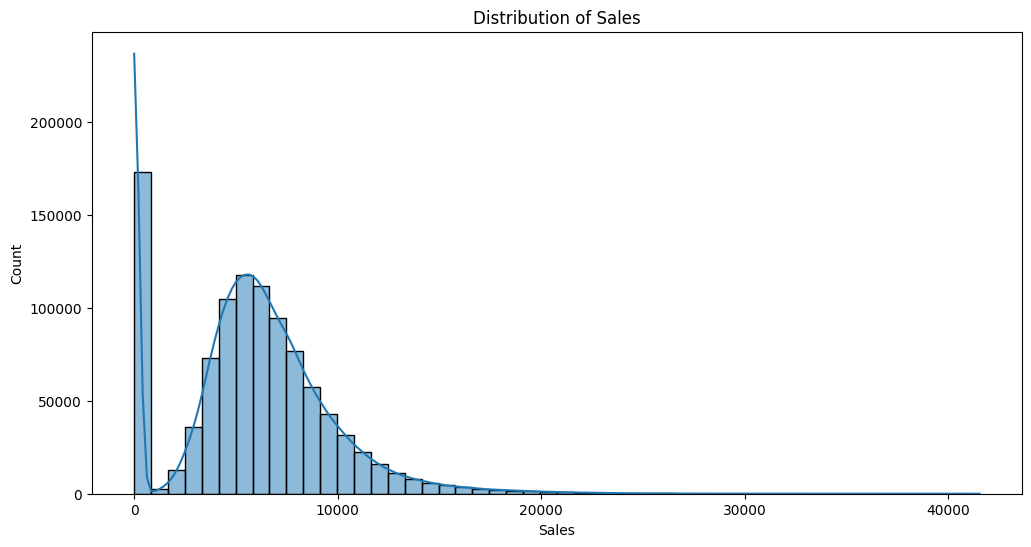

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(train['Sales'],bins=50,kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

<Axes: xlabel='Sales'>

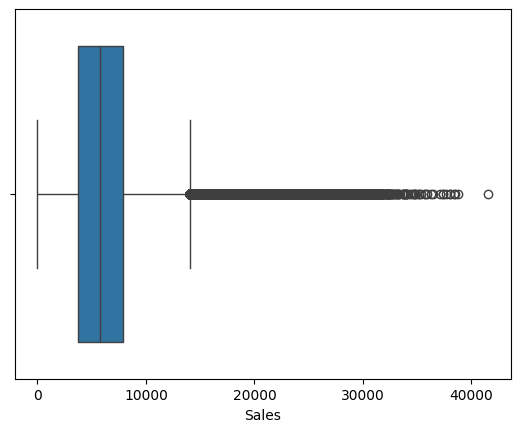

In [ ]:
sns.boxplot(x=train['Sales'])

Hình biểu đồ phân phối doanh thu (Sales) cho thấy dữ liệu có phân phối lệch phải (right-skewed), với phần lớn doanh số tập trung dưới 10,000, nhưng có một số giá trị rất lớn, lên đến hơn 40,000. Điều này cho thấy sự chênh lệch lớn trong doanh số, với một số ít giao dịch có giá trị cực cao.

<ipython-input-23-64175ea28681>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=var, data=train, ax=ax, palette="viridis")
<ipython-input-23-64175ea28681>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=var, data=train, ax=ax, palette="viridis")
<ipython-input-23-64175ea28681>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=var, data=train, ax=ax, palette="viridis")
<ipython-input-23-64175ea28681>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

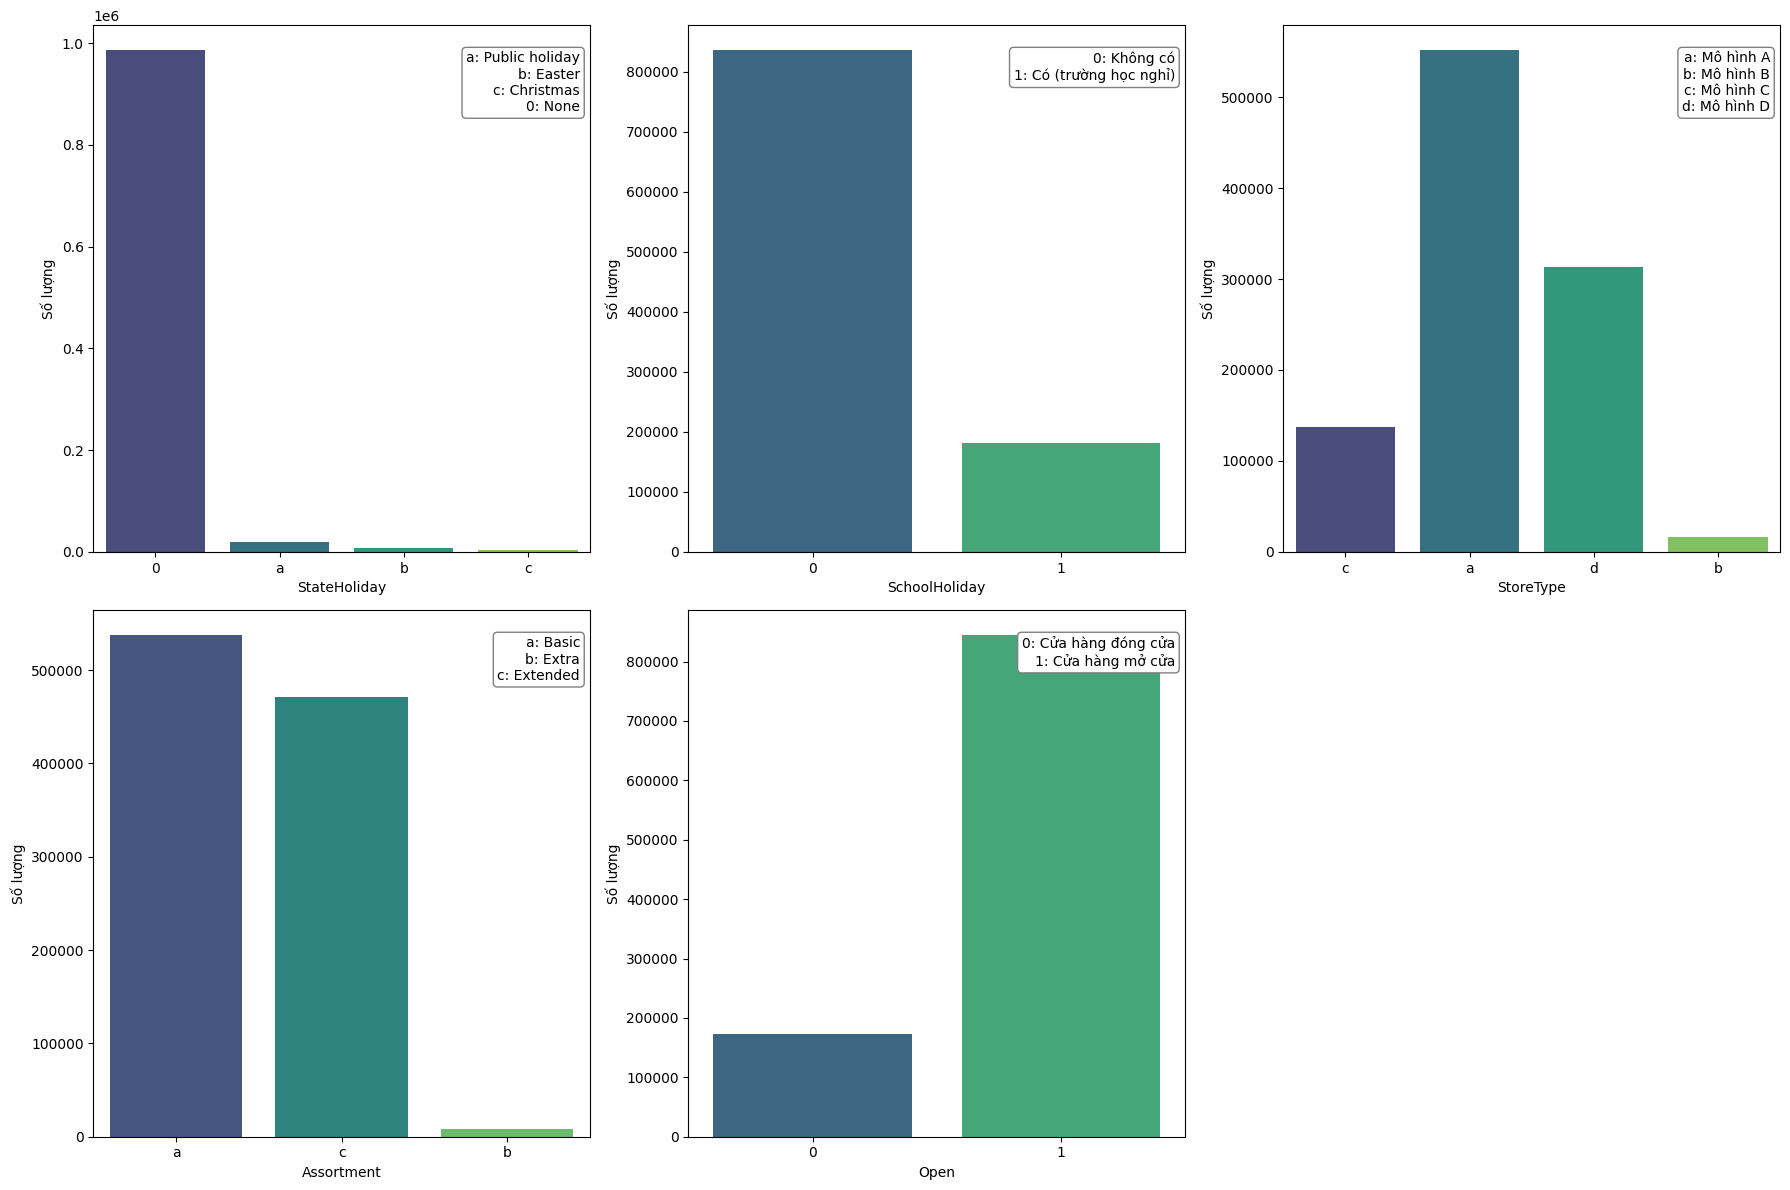

In [ ]:

categorical_vars = ['StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Open']
train['StateHoliday'] = train['StateHoliday'].astype(str).replace('0.0', '0')
annotations = {
    'StateHoliday': ['a: Public holiday', 'b: Easter', 'c: Christmas', '0: None'],
    'SchoolHoliday': ['0: Không có', '1: Có (trường học nghỉ)'],
    'StoreType': ['a: Mô hình A', 'b: Mô hình B', 'c: Mô hình C', 'd: Mô hình D'],
    'Assortment': ['a: Basic', 'b: Extra', 'c: Extended'],
    'Open': ['0: Cửa hàng đóng cửa', '1: Cửa hàng mở cửa'],
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes[i]

    bars = sns.countplot(x=var, data=train, ax=ax, palette="viridis")
    colors = [bar.get_facecolor() for bar in bars.patches]

    ax.set_xlabel(var)
    ax.set_ylabel("Số lượng")

    if var in annotations:
        annotation_text = "\n".join(annotations[var])

        ax.text(0.98, 0.95, annotation_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"))

for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Phân tích 2 biến

<ipython-input-24-b931df1439a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StateHoliday', y='Sales', data=train, order=['0', 'a', 'b', 'c'], ax=axes[0, 0], palette="viridis")
<ipython-input-24-b931df1439a7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SchoolHoliday', y='Sales', data=train, ax=axes[0, 1], palette="viridis")
<ipython-input-24-b931df1439a7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Assortment', y='Sales', data=train, ax=axes[0, 2], palette="viridis")
<ipython-input-24-b931df1439a7>:18: FutureWarning: 

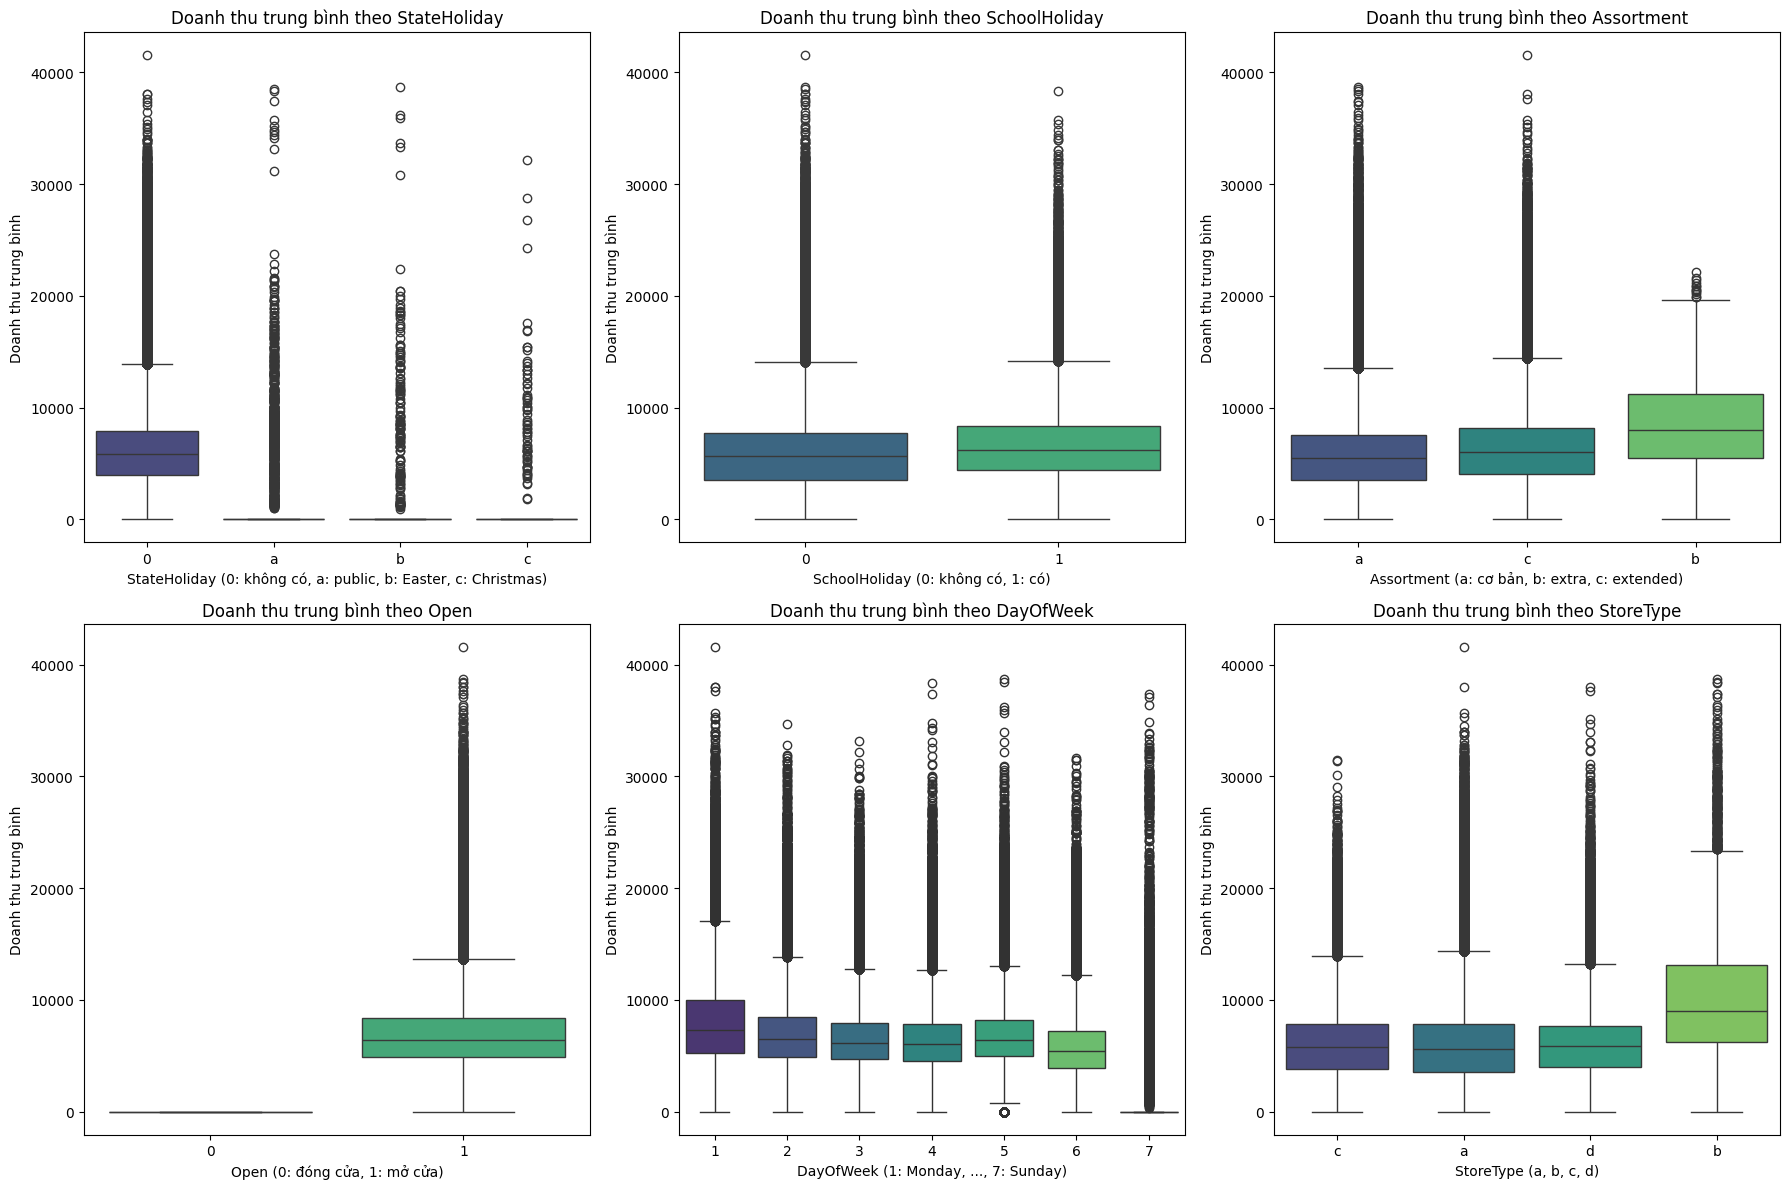

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.boxplot(x='StateHoliday', y='Sales', data=train, order=['0', 'a', 'b', 'c'], ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Doanh thu trung bình theo StateHoliday")
axes[0, 0].set_xlabel("StateHoliday (0: không có, a: public, b: Easter, c: Christmas)")
axes[0, 0].set_ylabel("Doanh thu trung bình")

sns.boxplot(x='SchoolHoliday', y='Sales', data=train, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Doanh thu trung bình theo SchoolHoliday")
axes[0, 1].set_xlabel("SchoolHoliday (0: không có, 1: có)")
axes[0, 1].set_ylabel("Doanh thu trung bình")

sns.boxplot(x='Assortment', y='Sales', data=train, ax=axes[0, 2], palette="viridis")
axes[0, 2].set_title("Doanh thu trung bình theo Assortment")
axes[0, 2].set_xlabel("Assortment (a: cơ bản, b: extra, c: extended)")
axes[0, 2].set_ylabel("Doanh thu trung bình")

sns.boxplot(x='Open', y='Sales', data=train, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Doanh thu trung bình theo Open")
axes[1, 0].set_xlabel("Open (0: đóng cửa, 1: mở cửa)")
axes[1, 0].set_ylabel("Doanh thu trung bình")

sns.boxplot(x='DayOfWeek', y='Sales', data=train, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("Doanh thu trung bình theo DayOfWeek")
axes[1, 1].set_xlabel("DayOfWeek (1: Monday, ..., 7: Sunday)")
axes[1, 1].set_ylabel("Doanh thu trung bình")

sns.boxplot(x='StoreType', y='Sales', data=train, ax=axes[1, 2], palette="viridis")
axes[1, 2].set_title("Doanh thu trung bình theo StoreType")
axes[1, 2].set_xlabel("StoreType (a, b, c, d)")
axes[1, 2].set_ylabel("Doanh thu trung bình")


plt.tight_layout()
plt.show()


<Axes: xlabel='DayOfWeek'>

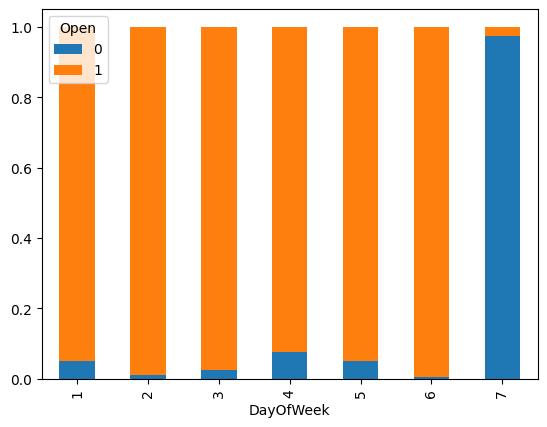

In [ ]:
train.groupby('DayOfWeek')['Open'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='StateHoliday'>

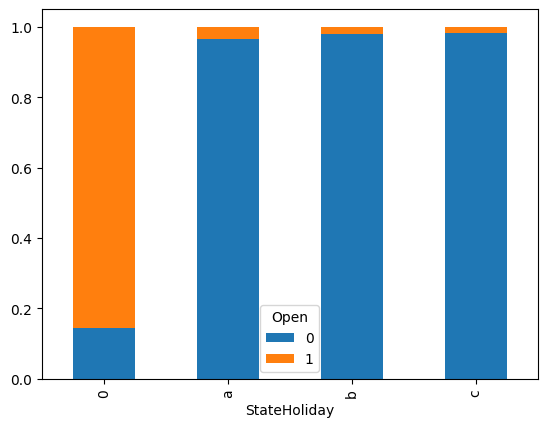

In [ ]:
train.groupby('StateHoliday')['Open'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


Qua 2 biểu đồ trên ta dễ thấy rằng các cửa hàng ở đa số đều đóng của và Chủ nhật và các ngày lễ quan trọng như Giáng sinh, Lễ Phục sinh,... còn ngày nghỉ của trường học thì đa số vẫn mở cửa. Điều này xảy ra là vì ở Đức có quy định về việc đóng cửa toàn bộ cửa hàng vào ngày Chủ nhật,ngày lễ lớn tuy nhiên hiện nay cũng có phần nới lỏng hơn.

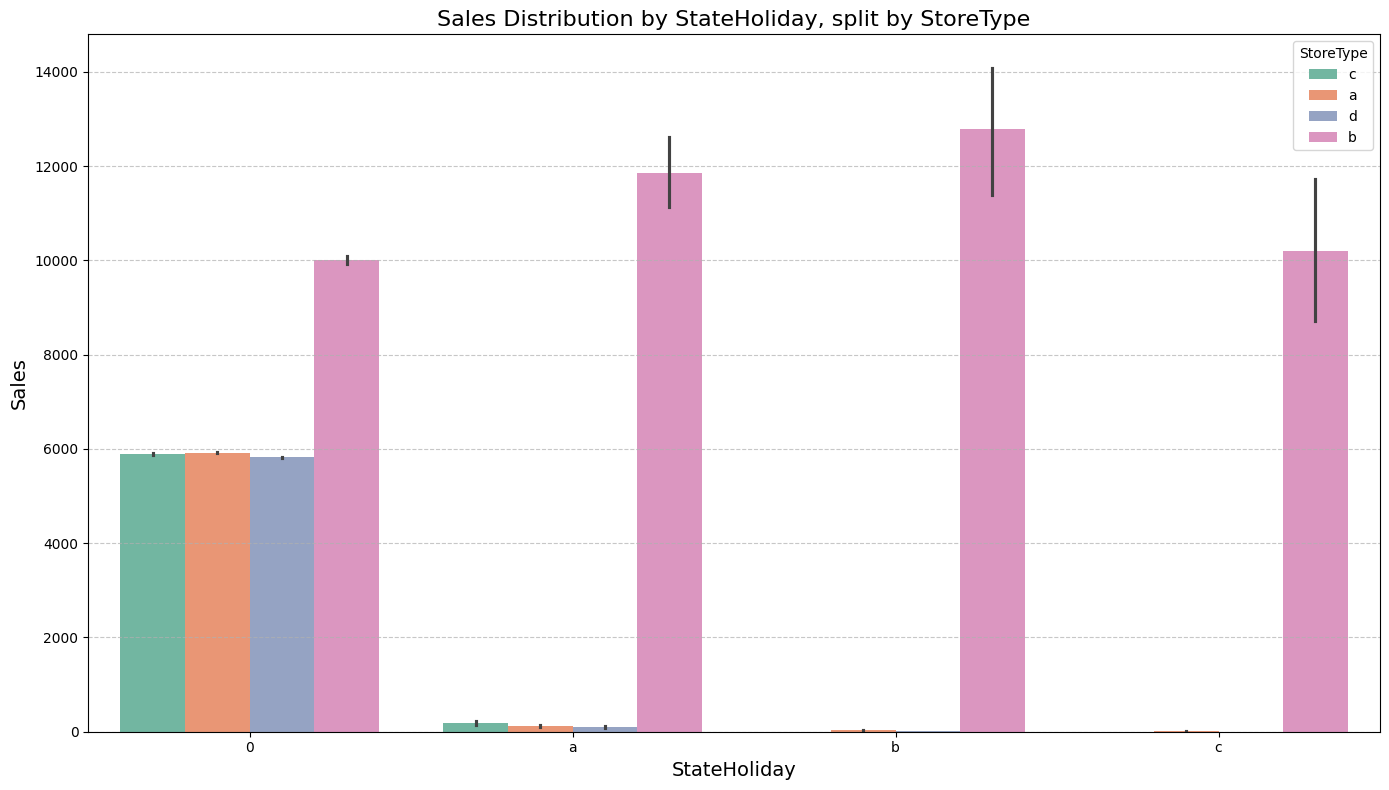

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='StateHoliday', y='Sales', hue='StoreType', data=train, palette='Set2')

plt.title('Sales Distribution by StateHoliday, split by StoreType', fontsize=16)
plt.xlabel('StateHoliday', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(title='StoreType')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


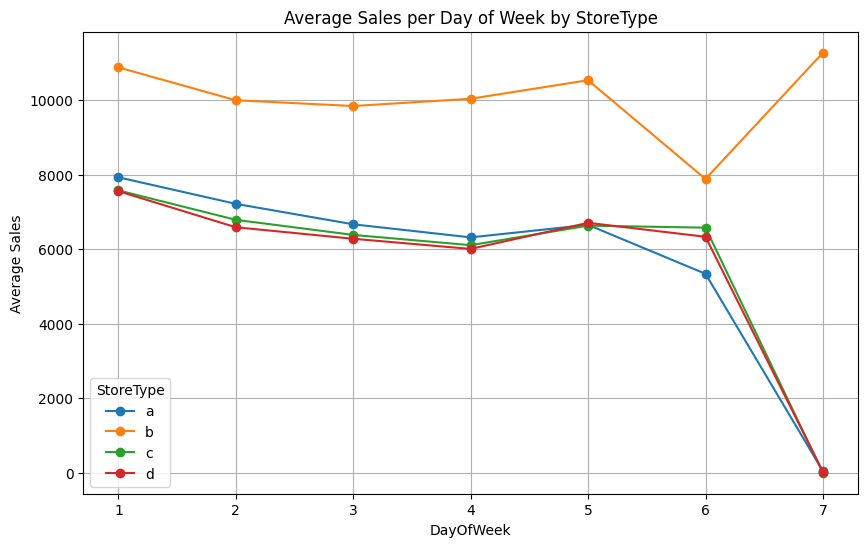

In [ ]:
pivot = train.pivot_table(values='Sales', index='DayOfWeek', columns='StoreType', aggfunc='mean')

pivot.plot(kind='line', figsize=(10,6), marker='o')
plt.title("Average Sales per Day of Week by StoreType")
plt.ylabel("Average Sales")
plt.grid()
plt.show()


<Axes: title={'center': 'Average Sales by Month'}, xlabel='Date'>

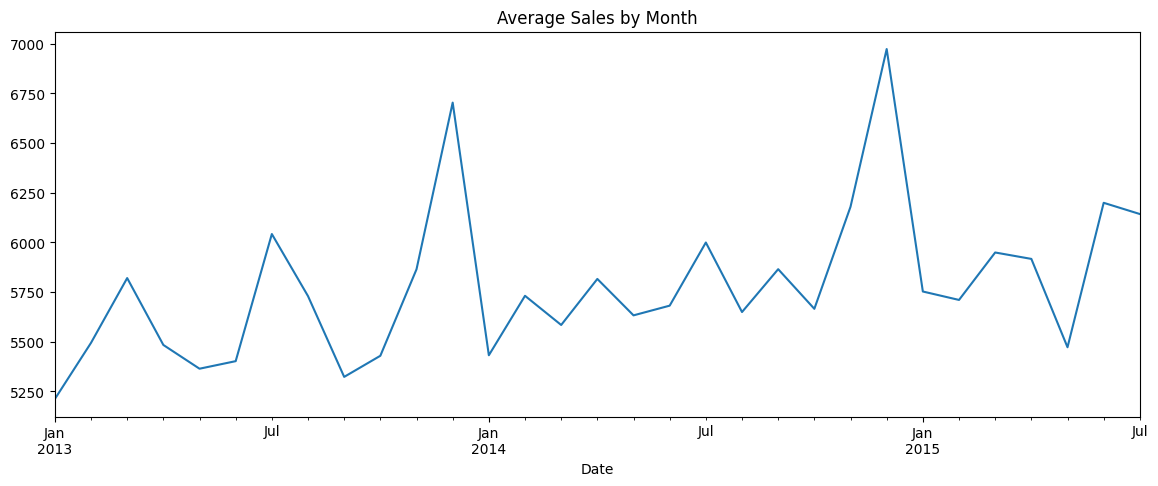

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train.groupby(train['Date'].dt.to_period('M'))['Sales'].mean().plot(figsize=(14, 5), title='Average Sales by Month')

Để có cái nhìn rõ hơn thì ta xem xét biểu đồ trực quan hóa chi tiết doanh thu trung bình hàng tháng qua từng năm, và như đã nói ở trên, thì doanh thu đặc biệt tăng mạnh vào các tháng 3, kỳ nghỉ hè ( tháng 6,7 ) và dịp cuối năm ( tháng 12 )

<ipython-input-28-0d48966e8891>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Promo", y="Sales", data=train, ax=axes[0], palette="viridis")
<ipython-input-28-0d48966e8891>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Promo2", y="Sales", data=train, ax=axes[1], palette="magma")


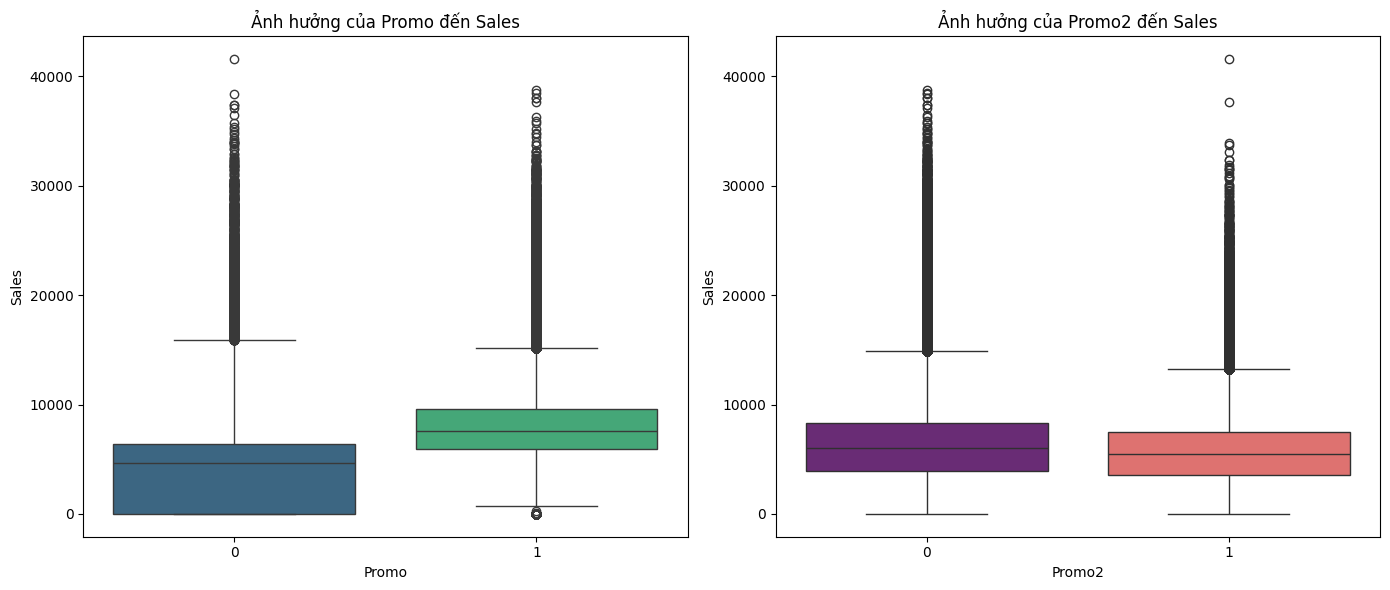

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x="Promo", y="Sales", data=train, ax=axes[0], palette="viridis")
axes[0].set_title("Ảnh hưởng của Promo đến Sales")

sns.boxplot(x="Promo2", y="Sales", data=train, ax=axes[1], palette="magma")
axes[1].set_title("Ảnh hưởng của Promo2 đến Sales")

plt.tight_layout()
plt.show()


## Phân tích đa biến


<ipython-input-29-b9e705d7fe41>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_corr['StateHoliday'] = df_corr['StateHoliday'].astype(str).replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)


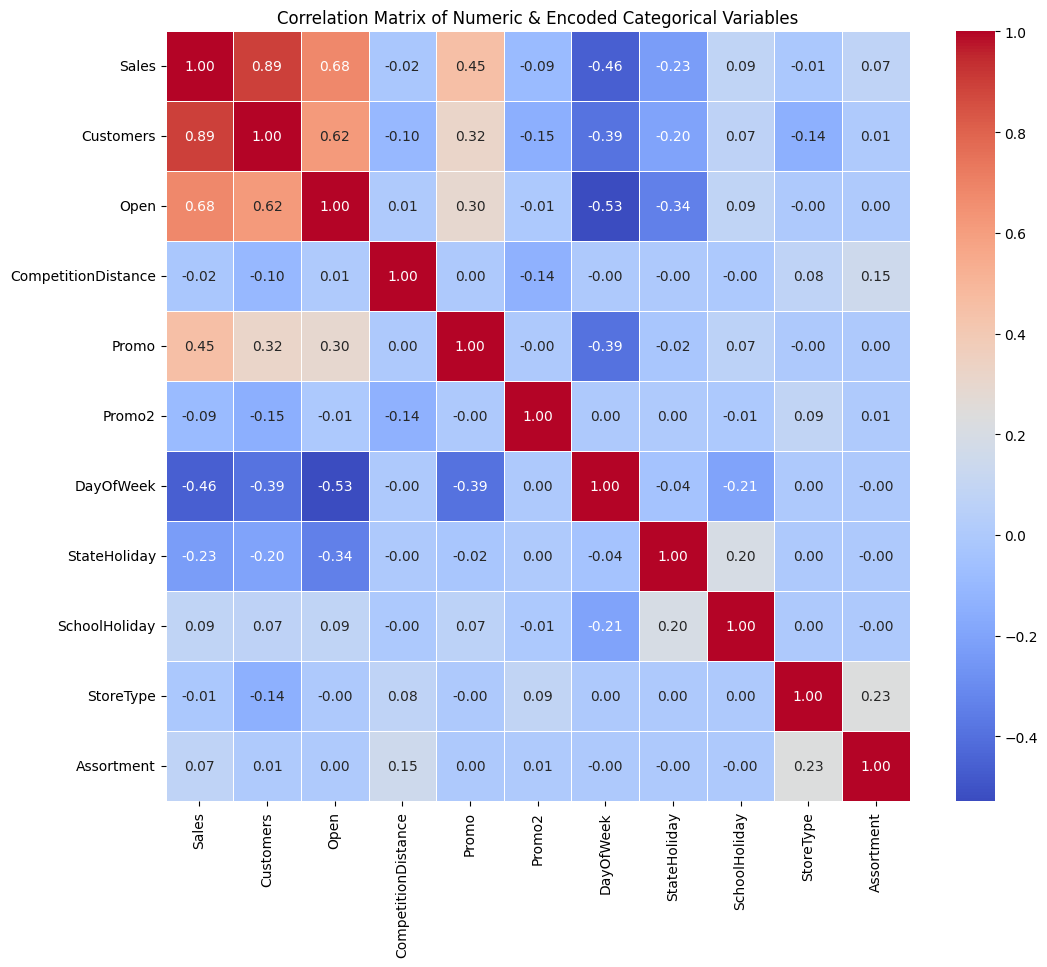

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_corr = train.copy()

df_corr['StateHoliday'] = df_corr['StateHoliday'].astype(str).replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)
df_corr['StoreType'] = df_corr['StoreType'].astype(str).map({'a': 0, 'b': 1, 'c': 2, 'd': 3})
df_corr['Assortment'] = df_corr['Assortment'].astype(str).map({'a': 0, 'b': 1, 'c': 2})

# Lựa chọn các cột số để tính ma trận tương quan
numeric_cols = [
    'Sales', 'Customers', 'Open', 'CompetitionDistance',
    'Promo', 'Promo2', 'DayOfWeek', 'StateHoliday',
    'SchoolHoliday', 'StoreType', 'Assortment'
]

# Tính toán và vẽ heatmap
correlation_matrix = df_corr[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric & Encoded Categorical Variables')
plt.show()


Dựa vào ma trận tương quan, ta thấy rằng mối tương quan giữa Sales và Customers là mạnh mẽ nhất, tiếp đến là Open - Sales, Open - Customers. Ngoài ra còn có feature Promo (khuyến mãi theo ngày) cũng ảnh hưởng ít nhiều đến Sales và Customers

# Preprocessing

## Xử lý `null`

In [ ]:
print(list(train.columns[train.isnull().sum() > 0]))
print(list(test.columns[test.isnull().sum() > 0]))

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
['Open', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


Các cột có giá trị thiếu trong cả `train` và `test` đều liên quan đến thông tin bên ngoài cửa hàng như cạnh tranh (`Competition*`) và khuyến mãi (`Promo2*`). Ngoài ra, `test` có cột `Open` bị thiếu, cần xử lý để tránh lỗi khi dự đoán.


In [ ]:
train[train['CompetitionDistance'].isnull()].shape

(2642, 18)

In [ ]:
train[train['CompetitionDistance'].isnull()][['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].value_counts()

,,count
CompetitionOpenSinceYear,CompetitionOpenSinceMonth,


Với cột `CompetitionDistance` nếu là `null` thì nghĩa là không có cửa hàng đối thủ hoặc không xác định. Nên cần điền giá trị đặc biệt là `0` để thể hiện thông tin đó. Nếu `CompetitionDistance` nếu là `null` thì kéo theo `CompetitionOpenSinceYear/Month` không còn giá trị nữa nên cũng cần điền giá trị đặc biệt tương ứng.



In [ ]:
train.loc[train['CompetitionDistance'].isnull(), ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']] = 0
train['CompetitionDistance'] = train['CompetitionDistance'].fillna(0)
test.loc[test['CompetitionDistance'].isnull(), ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']] = 0
test['CompetitionDistance'] = test['CompetitionDistance'].fillna(0)
print(train['CompetitionDistance'].isnull().sum())
print(test['CompetitionDistance'].isnull().sum())

0
0


In [ ]:
print(train[~train['CompetitionDistance'].isnull()]['CompetitionOpenSinceYear'].isnull().value_counts())
print(train[~train['CompetitionDistance'].isnull()]['CompetitionOpenSinceMonth'].isnull().value_counts())

CompetitionOpenSinceYear
False    696503
True     320706
Name: count, dtype: int64
CompetitionOpenSinceMonth
False    696503
True     320706
Name: count, dtype: int64


Ngược lại, nếu `CompetitionOpenSinceYear` hoặc `CompetitionOpenSinceMonth` bị thiếu, nhưng `CompetitionDistance` lại có giá trị thì ta sẽ điền 0 mang ý nghĩa có đối thủ cạnh tranh, nhưng không rõ thời điểm đối thủ bắt đầu hoạt động.

In [ ]:
# Gán cho train
train.loc[
    (train['CompetitionDistance'] != 0) & (train['CompetitionOpenSinceYear'].isnull()),
    'CompetitionOpenSinceYear'
] = 0

train.loc[
    (train['CompetitionDistance'] != 0) & (train['CompetitionOpenSinceMonth'].isnull()),
    'CompetitionOpenSinceMonth'
] = 0

# Gán cho test
test.loc[
    (test['CompetitionDistance'] != 0) & (test['CompetitionOpenSinceYear'].isnull()),
    'CompetitionOpenSinceYear'
] = 0

test.loc[
    (test['CompetitionDistance'] != 0) & (test['CompetitionOpenSinceMonth'].isnull()),
    'CompetitionOpenSinceMonth'
] = 0

print(train[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].isnull().sum())
print(test[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].isnull().sum())

CompetitionOpenSinceYear     0
CompetitionOpenSinceMonth    0
dtype: int64
CompetitionOpenSinceYear     0
CompetitionOpenSinceMonth    0
dtype: int64


In [ ]:
train[['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']].isnull().sum()

,0
Promo2SinceYear,508031
Promo2SinceWeek,508031
PromoInterval,508031


In [ ]:
train[train['Promo2'] == 0][['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']].isnull().sum()

,0
Promo2SinceYear,508031
Promo2SinceWeek,508031
PromoInterval,508031


Với các cột `Promo2SinceMonth`, `Promo2SinceYear` và `PromoInterval` thì luôn luôn `null` cùng nhau và `null` khi và chỉ khi `Promo2=0` (không tham gia chương trình khuyến mãi liên tục) nên ta sẽ fill với giá trị đặc biệt là `0` hoặc `None` để thể hiện thông tin trên

In [ ]:
train.loc[train['Promo2'] == 0, ['Promo2SinceYear', 'Promo2SinceWeek']] = 0
train.loc[train['Promo2'] == 0, ['PromoInterval']] = 'None'
test.loc[test['Promo2'] == 0, ['Promo2SinceYear', 'Promo2SinceWeek']] = 0
test.loc[test['Promo2'] == 0, ['PromoInterval']] = 'None'
print(train[['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']].isnull().sum())
print(test[['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']].isnull().sum())


Promo2SinceYear    0
Promo2SinceWeek    0
PromoInterval      0
dtype: int64
Promo2SinceYear    0
Promo2SinceWeek    0
PromoInterval      0
dtype: int64


In [ ]:
print(test.shape)
print(test['Open'].isnull().sum())

(41088, 17)
11


Trong tập test, cột `Open` bị thiếu, ta giả định rằng cửa hàng vẫn mở cửa → điền `1`

In [ ]:
test['Open'] = test['Open'].fillna(1)
print(test['Open'].isnull().sum())

0


In [ ]:
fill_values = np.where(test['DayOfWeek'] == 6, 0, 1)

# Chỉ điền vào các vị trí có NaN trong Open
mask = test['Open'].isna()
test.loc[mask, 'Open'] = pd.Series(fill_values[mask], index=test.index[mask])

In [ ]:
print(list(train.columns[train.isnull().sum() > 0]))
print(list(test.columns[test.isnull().sum() > 0]))

[]
[]


## Xử lý outlier

Trong dữ liệu chuỗi thời gian, các điểm bất thường (outlier) không phải lúc nào cũng nên loại bỏ. Chúng có thể phản ánh những sự kiện thực tế như chương trình khuyến mãi, thời tiết đột biến, hoặc dịp lễ khiến doanh số tăng cao bất thường. Việc loại bỏ các outlier này có thể khiến mô hình mất đi khả năng học được các xu hướng đột biến có thể tái diễn trong tương lai.

Thay vì loại bỏ các điểm outlier, một phương pháp xử lý hiệu quả là áp dụng biến đổi log (log-transform). Phương pháp này giúp nén khoảng cách giữa các giá trị lớn và nhỏ, từ đó giảm ảnh hưởng của các giá trị cực đoan (outlier) lên mô hình học máy. Đồng thời, log-transform vẫn giữ nguyên được thứ tự tương đối giữa các quan sát và bảo toàn thông tin quan trọng về xu hướng biến động của dữ liệu, đặc biệt hữu ích trong các bài toán hồi quy với dữ liệu lệch phải như doanh số bán hàng.

In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,None
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,None


In [ ]:
num_invalid_rows = train[(train["Open"] == 1) & (train["Sales"] == 0)].shape[0]
print("Số dòng có Open = 1 và Sales = 0:", num_invalid_rows)

Số dòng có Open = 1 và Sales = 0: 54


In [ ]:
train = train[~((train["Open"] == 1) & (train["Sales"] == 0))]

In [ ]:
def mad_based_outlier(points, thresh=3.5):
    points = np.array(points)
    if len(points.shape) == 1:
        points = points[:, np.newaxis]
    median = np.median(points, axis=0)
    diff = np.sum((points - median) ** 2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh

# Bước 3: Đánh dấu outlier trong cột Sales cho từng cửa hàng (chỉ khi Open == 1)
for i in train['Store'].unique():
    train.loc[(train['Store'] == i) & (train['Open'] == 1), 'Outlier'] = \
        mad_based_outlier(train.loc[(train['Store'] == i) & (train['Open'] == 1)]['Sales'], 3)

# Bước 4: Xóa các hàng có Outlier == True
train = train[~train['Outlier'].isna() & (train['Outlier'] == False)]

train = train.drop('Outlier', axis=1)

<ipython-input-32-3e5df79b476b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[(train['Store'] == i) & (train['Open'] == 1), 'Outlier'] = \


<Axes: xlabel='Sales'>

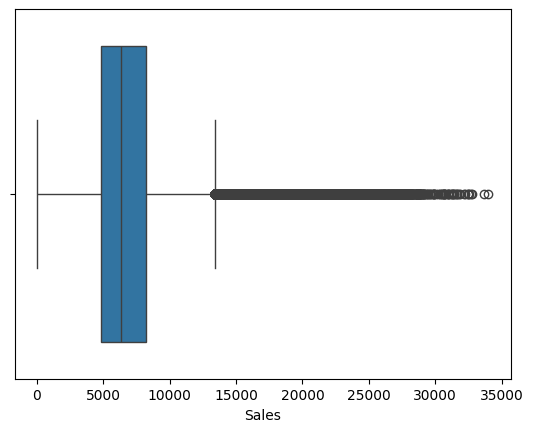

In [ ]:
sns.boxplot(x=train['Sales'])

In [ ]:
train['Sales'] = np.log1p(train['Sales'])

<Axes: xlabel='Sales'>

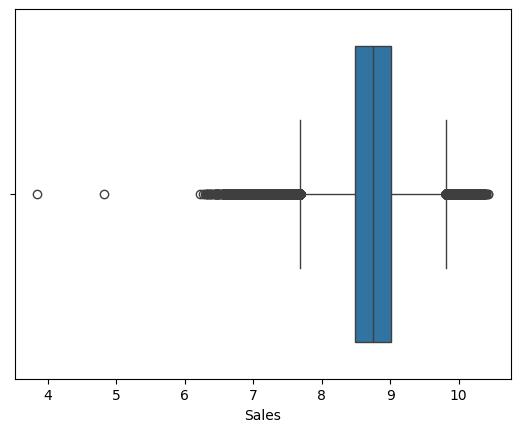

In [ ]:
sns.boxplot(x=train['Sales'])

In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016770,676,2,2013-01-01,3821,777,1,0,a,1,b,b,1410.0,9.0,2008.0,0,0.0,0.0,None
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,None
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,None
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,None


## Mã hóa và chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

Ta sử dụng `LabelEncoder` để chuyển các cột phân loại thành dạng số. Mỗi cột cần một LabelEncoder riêng để đảm bảo việc ánh xạ đúng giữa giá trị gốc và giá trị số.

In [ ]:
cat_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [ ]:
for col in cat_cols:
    print(col, train[col].unique(), test[col].unique())

StateHoliday ['0' 'a' 'b' 'c'] ['0' 'a']
StoreType ['c' 'a' 'd' 'b'] ['c' 'a' 'd' 'b']
Assortment ['a' 'c' 'b'] ['a' 'c' 'b']
PromoInterval ['None' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec'] ['None' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    encoders[col] = le

Các cột dạng số được chuẩn hóa bằng `StandardScaler`.
Ta không cần normalize các cột nhị phân như `Open`, `Promo`, `SchoolHoliday`, vì chúng đã ở dạng `0/1`.


In [ ]:
for col in cat_cols:
    print(col, train[col].unique(), test[col].unique())

StateHoliday [0 1 2 3] [0 1]
StoreType [2 0 3 1] [2 0 3 1]
Assortment [0 2 1] [0 2 1]
PromoInterval [3 1 0 2] [3 1 0 2]


In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,3
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016770,676,2,2013-01-01,3821,777,1,0,1,1,1,1,1410.0,9.0,2008.0,0,0.0,0.0,3
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150.0,9.0,2006.0,0,0.0,0.0,3
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860.0,10.0,1999.0,0,0.0,0.0,3
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430.0,0.0,0.0,0,0.0,0.0,3


In [ ]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3
1,2,3,4,2015-09-17,1.0,1,0,0,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1
2,3,7,4,2015-09-17,1.0,1,0,0,0,2,24000.0,4.0,2013.0,0,0.0,0.0,3
3,4,8,4,2015-09-17,1.0,1,0,0,0,0,7520.0,10.0,2014.0,0,0.0,0.0,3
4,5,9,4,2015-09-17,1.0,1,0,0,0,2,2030.0,8.0,2000.0,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,2,2,1880.0,4.0,2006.0,0,0.0,0.0,3
41085,41086,1113,6,2015-08-01,1.0,0,0,0,0,2,9260.0,0.0,0.0,0,0.0,0.0,3
41086,41087,1114,6,2015-08-01,1.0,0,0,0,0,2,870.0,0.0,0.0,0,0.0,0.0,3


# Feature engineering

### Đặc trưng cho từng cửa hàng


In [ ]:
train_open = train[train['Open'] == 1]

store_sales = train_open.groupby('Store')['Sales'].sum()
store_customers = train_open.groupby('Store')['Customers'].sum()
store_open_days = train_open.groupby('Store')['Open'].count()

# Tính trung bình
store_sales_per_day = store_sales / store_open_days
store_customers_per_day = store_customers / store_open_days
store_sales_per_customer_per_day = store_sales_per_day / store_customers_per_day


In [ ]:
store_features = pd.DataFrame({
    'Store': store_sales_per_day.index,
    'SalesPerDay': store_sales_per_day.values,
    'CustomersPerDay': store_customers_per_day.values,
    'SalesPerCustomersPerDay': store_sales_per_customer_per_day.values
})

train = pd.merge(train, store_features, on='Store', how='left')
test = pd.merge(test, store_features, on='Store', how='left')


In [ ]:
train = train.drop('Customers', axis=1)

### Promotions

Ở store.csv ta có 2 cột là Promo2SinceYear và Promo2SinceWeek, vì thế ta có thể xử lý để gộp lại thành 1 cột biểu diễn cho thời gian kể từ khi Promo2 bắt đầu

In [ ]:
train["Date"] = pd.to_datetime(train["Date"])
def add_Promo2StartDate(df):
    """
    Thêm cột Promo2StartDate vào DataFrame, chỉ khi Promo2 == 1 và có đầy đủ thông tin về năm & tuần.
    """
    df = df.copy()
    df["Promo2StartDate"] = pd.NaT
    mask = (df["Promo2"] == 1) & (df["Promo2SinceYear"].notnull()) & (df["Promo2SinceWeek"].notnull())
    df.loc[mask, "Promo2StartDate"] = pd.to_datetime(
        df.loc[mask, "Promo2SinceYear"].astype(int).astype(str) + ' ' +
        df.loc[mask, "Promo2SinceWeek"].astype(int).astype(str) + ' 1',
        format='%Y %W %w',
        errors='coerce'
    )
    return df
train = add_Promo2StartDate(train)
test = add_Promo2StartDate(test)

In [ ]:
train["TimeSincePromo2Start"] = train["Date"]-train["Promo2StartDate"]
train["TimeSincePromo2Start"] = train["TimeSincePromo2Start"].fillna(pd.Timedelta(0))
train=train.drop("Promo2StartDate",axis=1)

In [ ]:
test["Date"] = pd.to_datetime(test["Date"])
test["TimeSincePromo2Start"] = test["Date"]-test["Promo2StartDate"]
test["TimeSincePromo2Start"] = test["TimeSincePromo2Start"].fillna(pd.Timedelta(0))
test=test.drop("Promo2StartDate",axis=1)

### Competitions

Tương tự, ta có 2 cột CompetionOpenSinceYear và CompetitionOpenSinceMonth có thể được xử lý để thành một cột mới

In [ ]:
import pandas as pd

def add_CompetitionOpenDay(df):
    """
    Thêm cột CompetitionOpenDay vào DataFrame từ các cột CompetitionOpenSinceYear và CompetitionOpenSinceMonth.
    """
    df = df.copy()
    df["CompetitionOpenDay"] = pd.NaT

    mask = (df["CompetitionOpenSinceYear"].notnull()) & (df["CompetitionOpenSinceMonth"].notnull())

    df.loc[mask, "CompetitionOpenDay"] = pd.to_datetime(
        df.loc[mask, "CompetitionOpenSinceYear"].astype(int).astype(str) + '-' +
        df.loc[mask, "CompetitionOpenSinceMonth"].astype(int).astype(str).str.zfill(2) + '-01',
        format='%Y-%m-%d',
        errors='coerce'
    )

    return df
train=add_CompetitionOpenDay(train)
test=add_CompetitionOpenDay(test)

In [ ]:
train["CompetitionAge"] = train["Date"] - train["CompetitionOpenDay"]

train["CompetitionAge"] = train["CompetitionAge"].mask(
    (train["CompetitionAge"].isna()) | (train["CompetitionAge"] < pd.Timedelta(0)),
    pd.Timedelta(0)
)
train=train.drop("CompetitionOpenDay",axis=1)

In [ ]:
test["CompetitionAge"] = test["Date"] - test["CompetitionOpenDay"]

test["CompetitionAge"] = test["CompetitionAge"].mask(
    (test["CompetitionAge"].isna()) | (test["CompetitionAge"] < pd.Timedelta(0)),
    pd.Timedelta(0)
)
test=test.drop("CompetitionOpenDay",axis=1)

### DateTime

In [ ]:
def add_date_parts(df):
    """
    Thêm các đặc trưng thời gian từ cột 'Date': Year, Month, Day_Month, Week_Year, Day_Week.
    """
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])  # đảm bảo cột Date ở dạng datetime

    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day_Month"] = df["Date"].dt.day
    df["Week_Year"] = df["Date"].dt.isocalendar().week.astype(int)
    df["Day_Week"] = df["Date"].dt.dayofweek  # 0 = Monday, 6 = Sunday

    return df
train=add_date_parts(train)
test=add_date_parts(test)

In [ ]:
train.dtypes

,0
Store,int64
DayOfWeek,int64
Date,datetime64[ns]
Sales,int64
Open,int64
Promo,int64
StateHoliday,int64
SchoolHoliday,int64
StoreType,int64
Assortment,int64


vì các biến thời gian như ngày, tháng, tuần có tính chất tuần hoàn nên ta dùng 2 hàm số cũng có tính chất toàn hoàn là sin và cos để encoding. Nếu chỉ dùng sin hoặc cos thì số giá trị khác nhau có thể bị ánh xạ trùng vào cùng 1 giá trị, dẫn đến mất thông tin.

Ví dụ: sin(0°) = sin(180°) = 0, nhưng rõ ràng 0° và 180° rất khác nhau

In [ ]:
def add_cyclical_feature(series, period):
    return pd.concat([
        np.sin(2*np.pi*series/period).rename(series.name+"_sin"),
        np.cos(2*np.pi*series/period).rename(series.name+"_cos")
    ],axis=1)
train = pd.concat([
    train,
    add_cyclical_feature(train["Month"],12),
    add_cyclical_feature(train["Day_Month"],30),
    add_cyclical_feature(train["Day_Week"],7),
    add_cyclical_feature(train["Week_Year"],52),
],axis=1).drop(["Month","Day_Month","Day_Week","Week_Year"],axis=1)

test = pd.concat([
    test,
    add_cyclical_feature(test["Month"],12),
    add_cyclical_feature(test["Day_Month"],30),
    add_cyclical_feature(test["Day_Week"],7),
    add_cyclical_feature(test["Week_Year"],52),
],axis=1).drop(["Month","Day_Month","Day_Week","Week_Year"],axis=1)

In [ ]:
train["TimeSincePromo2Start"] = train["TimeSincePromo2Start"].dt.days.astype(int)
train["CompetitionAge"] = train["CompetitionAge"].dt.days.astype(int)

test["TimeSincePromo2Start"] = test["TimeSincePromo2Start"].dt.days.astype(int)
test["CompetitionAge"] = test["CompetitionAge"].dt.days.astype(int)

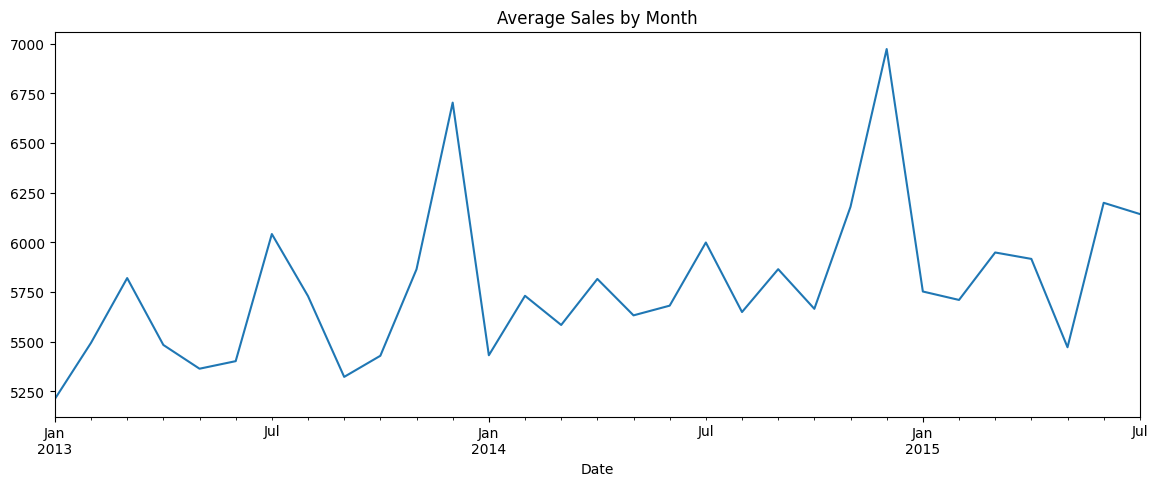
 Với biểu đồ này, ta thấy doanh thu tăng mạnh ở các khoảng thời gian Tháng 3, kỳ nghỉ hè (Tháng 6,7), trước Giáng sinh và năm mới (Tháng 11,12) nên có thể dùng các bộ đếm tới các mốc thời gian đó

In [ ]:
import pandas as pd
import numpy as np

def add_time_based_features(df):

    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])

    days_to_mar1 = (pd.to_datetime(df['Date'].dt.year.astype(str) + '-03-01') - df['Date']).dt.days
    df['Days_To_Mar1'] = days_to_mar1.apply(lambda x: x if x >= 0 else x + 365)

    days_to_jul1 = (pd.to_datetime(df['Date'].dt.year.astype(str) + '-07-01') - df['Date']).dt.days
    df['Days_To_Jul1'] = days_to_jul1.apply(lambda x: x if x >= 0 else x + 365)

    days_to_dec1 = (pd.to_datetime(df['Date'].dt.year.astype(str) + '-12-01') - df['Date']).dt.days
    df['Days_To_Dec1'] = days_to_dec1.apply(lambda x: x if x >= 0 else x + 365)
    return df


In [ ]:
train=add_time_based_features(train)
test=add_time_based_features(test)

In [ ]:
train=train.drop(columns=["Date","DayOfWeek","Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth"])
test=test.drop(columns=["Date","DayOfWeek","Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth"])

In [ ]:
train

,Store,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Month_cos,Day_Month_sin,Day_Month_cos,Day_Week_sin,Day_Week_cos,Week_Year_sin,Week_Year_cos,Days_To_Mar1,Days_To_Jul1,Days_To_Dec1
0,1,5263,1,1,0,1,2,0,1270.0,0,...,-0.866025,0.207912,0.978148,-0.433884,-0.900969,-0.568065,-0.822984,213,335,123
1,2,6064,1,1,0,1,0,0,570.0,1,...,-0.866025,0.207912,0.978148,-0.433884,-0.900969,-0.568065,-0.822984,213,335,123
2,3,8314,1,1,0,1,0,0,14130.0,1,...,-0.866025,0.207912,0.978148,-0.433884,-0.900969,-0.568065,-0.822984,213,335,123
3,4,13995,1,1,0,1,2,2,620.0,0,...,-0.866025,0.207912,0.978148,-0.433884,-0.900969,-0.568065,-0.822984,213,335,123
4,5,4822,1,1,0,1,0,0,29910.0,0,...,-0.866025,0.207912,0.978148,-0.433884,-0.900969,-0.568065,-0.822984,213,335,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831354,676,3821,1,0,1,1,1,1,1410.0,0,...,0.866025,0.207912,0.978148,0.781831,0.623490,0.120537,0.992709,59,181,334
831355,682,3375,1,0,1,1,1,0,150.0,0,...,0.866025,0.207912,0.978148,0.781831,0.623490,0.120537,0.992709,59,181,334
831356,733,10765,1,0,1,1,1,1,860.0,0,...,0.866025,0.207912,0.978148,0.781831,0.623490,0.120537,0.992709,59,181,334
831357,948,4491,1,0,1,1,1,1,1430.0,0,...,0.866025,0.207912,0.978148,0.781831,0.623490,0.120537,0.992709,59,181,334


In [ ]:
test

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Month_cos,Day_Month_sin,Day_Month_cos,Day_Week_sin,Day_Week_cos,Week_Year_sin,Week_Year_cos,Days_To_Mar1,Days_To_Jul1,Days_To_Dec1
0,1,1,1.0,1,0,0,2,0,1270.0,0,...,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,-0.992709,-0.120537,165,287,75
1,2,3,1.0,1,0,0,0,0,14130.0,1,...,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,-0.992709,-0.120537,165,287,75
2,3,7,1.0,1,0,0,0,2,24000.0,0,...,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,-0.992709,-0.120537,165,287,75
3,4,8,1.0,1,0,0,0,0,7520.0,0,...,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,-0.992709,-0.120537,165,287,75
4,5,9,1.0,1,0,0,0,2,2030.0,0,...,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,-0.992709,-0.120537,165,287,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,1.0,0,0,0,0,0,1900.0,1,...,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,-0.568065,-0.822984,212,334,122
41084,41085,1112,1.0,0,0,0,2,2,1880.0,0,...,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,-0.568065,-0.822984,212,334,122
41085,41086,1113,1.0,0,0,0,0,2,9260.0,0,...,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,-0.568065,-0.822984,212,334,122
41086,41087,1114,1.0,0,0,0,0,2,870.0,0,...,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,-0.568065,-0.822984,212,334,122


In [ ]:
print(train['Open'].unique())
print(train['Open'].isnull().sum())
print(train['Open'].dtype)

[1]
0
int64


### Correlation matrix

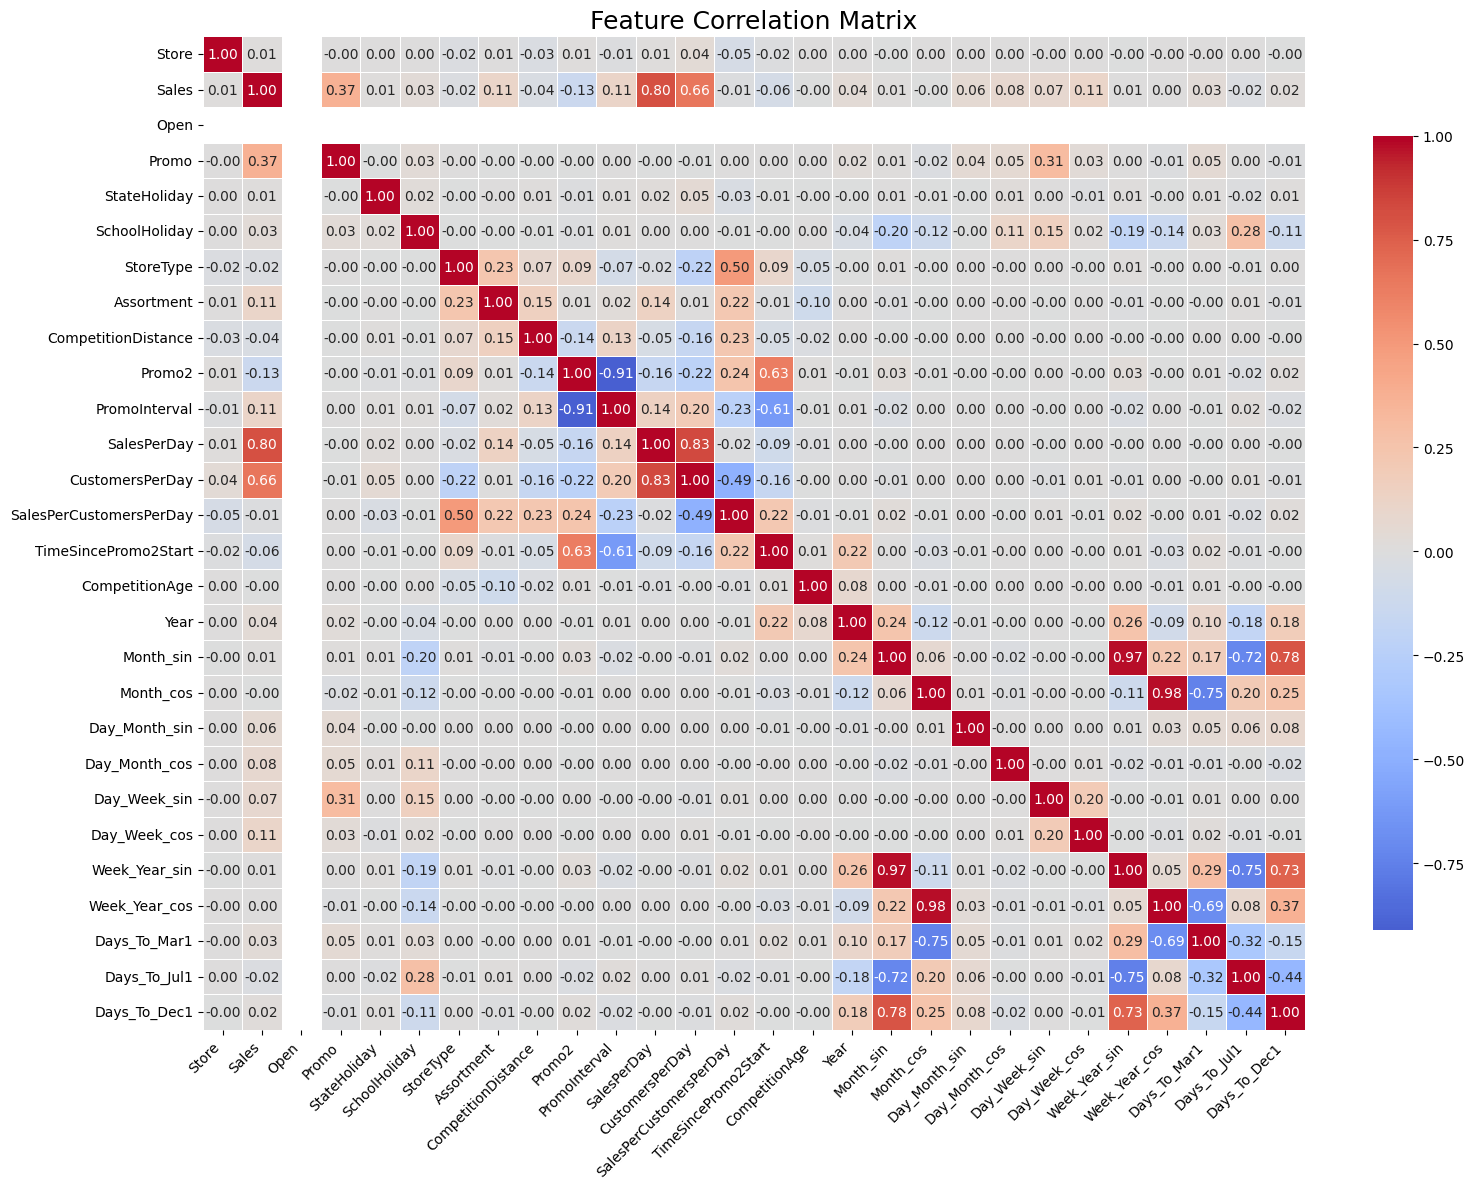

In [ ]:

corr_matrix = train.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Feature Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
corr_matrix = train.corr()
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)].stack()

print(high_corr)


Sales            SalesPerDay        0.769793
SalesPerDay      Sales              0.769793
                 CustomersPerDay    0.760482
CustomersPerDay  SalesPerDay        0.760482
Month_sin        Week_Year_sin      0.973610
                 Days_To_Dec1       0.783428
Month_cos        Week_Year_cos      0.975453
Week_Year_sin    Month_sin          0.973610
                 Days_To_Dec1       0.731211
Week_Year_cos    Month_cos          0.975453
Days_To_Dec1     Month_sin          0.783428
                 Week_Year_sin      0.731211
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Qua ma trận tương quan trên, ta thấy các cột Week_year_sin/cos và Month_sin/cos có tương quan cực kỳ cao ( 0.97 ). Vì thế, để tránh hiện tượng đa cộng tuyến, ta sẽ loại bỏ đi 1 trong 2 loại. Vì đóng góp của 2 loại gần như bằng nhau, Month_sin/cos chỉ nhỉnh hơn một chút nên ta có thể chọn giữ lại loại này

In [ ]:
train=train.drop(columns=["Week_Year_sin","Week_Year_cos"])

In [ ]:
test=test.drop(columns=["Week_Year_sin","Week_Year_cos"])

In [ ]:
train

,Store,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Year,Month_sin,Month_cos,Day_Month_sin,Day_Month_cos,Day_Week_sin,Day_Week_cos,Days_To_Mar1,Days_To_Jul1,Days_To_Dec1
0,1,5263,1,1,0,1,2,0,1270.0,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
1,2,6064,1,1,0,1,0,0,570.0,1,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
2,3,8314,1,1,0,1,0,0,14130.0,1,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
3,4,13995,1,1,0,1,2,2,620.0,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
4,5,4822,1,1,0,1,0,0,29910.0,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831354,676,3821,1,0,1,1,1,1,1410.0,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831355,682,3375,1,0,1,1,1,0,150.0,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831356,733,10765,1,0,1,1,1,1,860.0,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831357,948,4491,1,0,1,1,1,1,1430.0,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Tách các nhóm cột theo scaler
robust_cols = ['CompetitionDistance', 'TimeSincePromo2Start', 'CompetitionAge']
standard_cols = ['Days_To_Mar1', 'Days_To_Jul1', 'Days_To_Dec1']


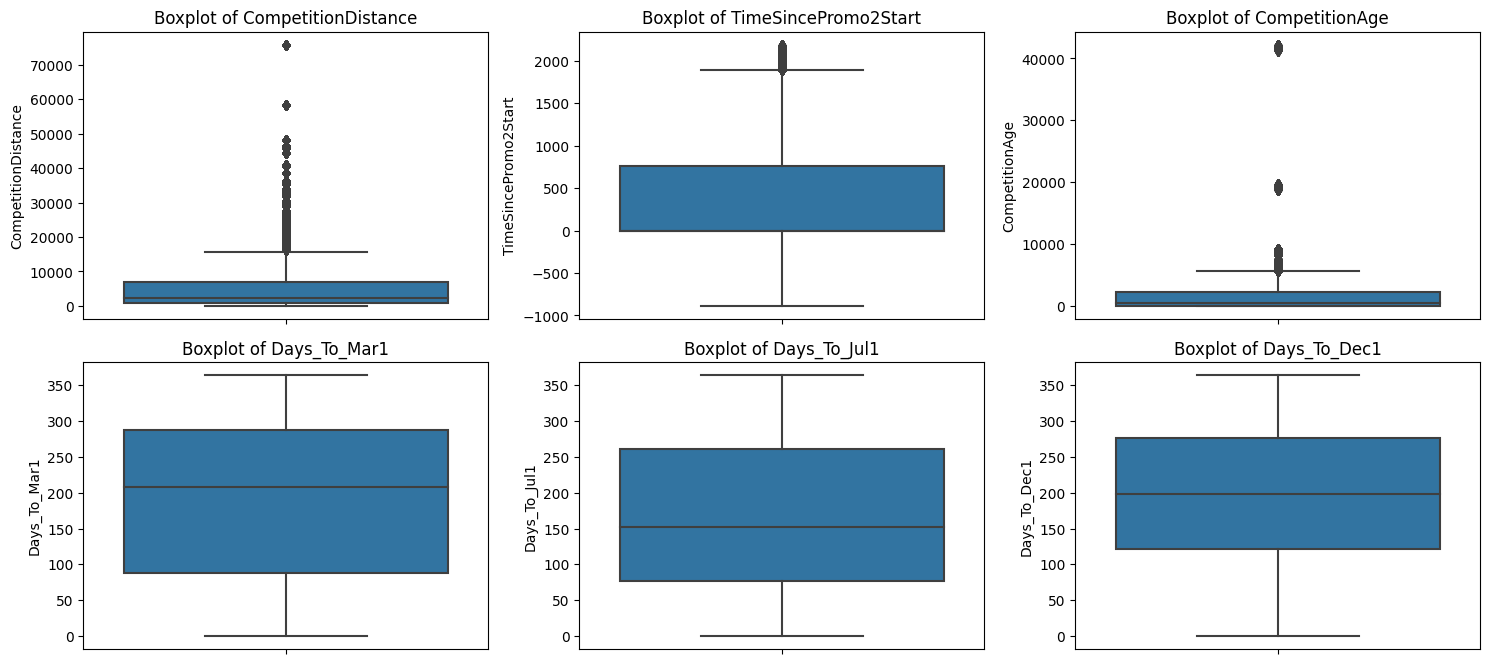

In [ ]:
plt.figure(figsize=(15, 10))

for idx, col in enumerate(columns, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(y=train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('robust', RobustScaler(), robust_cols),
])

train_scaled = preprocessor.fit_transform(train[robust_cols])
test_scaled = preprocessor.transform(test[robust_cols])

train[robust_cols] = train_scaled
test[robust_cols] = test_scaled

In [ ]:
train

,Store,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Year,Month_sin,Month_cos,Day_Month_sin,Day_Month_cos,Day_Week_sin,Day_Week_cos,Days_To_Mar1,Days_To_Jul1,Days_To_Dec1
0,1,8.568646,1,1,0,1,2,0,-0.169903,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
1,2,8.710290,1,1,0,1,0,0,-0.283172,1,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
2,3,9.025816,1,1,0,1,0,0,1.911003,1,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
3,4,9.546527,1,1,0,1,2,2,-0.275081,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
4,5,8.481151,1,1,0,1,0,0,4.464401,0,...,2015,-0.5,-0.866025,0.207912,0.978148,-0.433884,-0.900969,213,335,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831352,676,8.248529,1,0,1,1,1,1,-0.147249,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831353,682,8.124447,1,0,1,1,1,0,-0.351133,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831354,733,9.284148,1,0,1,1,1,1,-0.236246,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334
831355,948,8.410053,1,0,1,1,1,1,-0.144013,0,...,2013,0.5,0.866025,0.207912,0.978148,0.781831,0.623490,59,181,334


In [ ]:
test

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Year,Month_sin,Month_cos,Day_Month_sin,Day_Month_cos,Day_Week_sin,Day_Week_cos,Days_To_Mar1,Days_To_Jul1,Days_To_Dec1
0,1,1,1.0,1,0,0,2,0,-0.169903,0,...,2015,-1.000000,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,165,287,75
1,2,3,1.0,1,0,0,0,0,1.911003,1,...,2015,-1.000000,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,165,287,75
2,3,7,1.0,1,0,0,0,2,3.508091,0,...,2015,-1.000000,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,165,287,75
3,4,8,1.0,1,0,0,0,0,0.841424,0,...,2015,-1.000000,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,165,287,75
4,5,9,1.0,1,0,0,0,2,-0.046926,0,...,2015,-1.000000,-1.836970e-16,-0.406737,-0.913545,0.433884,-0.900969,165,287,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,1.0,0,0,0,0,0,-0.067961,1,...,2015,-0.866025,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,212,334,122
41084,41085,1112,1.0,0,0,0,2,2,-0.071197,0,...,2015,-0.866025,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,212,334,122
41085,41086,1113,1.0,0,0,0,0,2,1.122977,0,...,2015,-0.866025,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,212,334,122
41086,41087,1114,1.0,0,0,0,0,2,-0.234628,0,...,2015,-0.866025,-5.000000e-01,0.207912,0.978148,-0.974928,-0.222521,212,334,122


In [ ]:
print(train.dtypes)

Store                        int64
Sales                      float64
Open                         int64
Promo                        int64
StateHoliday                 int64
SchoolHoliday                int64
StoreType                    int64
Assortment                   int64
CompetitionDistance        float64
Promo2                       int64
PromoInterval                int64
SalesPerDay                float64
CustomersPerDay            float64
SalesPerCustomersPerDay    float64
TimeSincePromo2Start       float64
CompetitionAge             float64
Year                         int32
Month_sin                  float64
Month_cos                  float64
Day_Month_sin              float64
Day_Month_cos              float64
Day_Week_sin               float64
Day_Week_cos               float64
Days_To_Mar1                 int64
Days_To_Jul1                 int64
Days_To_Dec1                 int64
dtype: object


In [ ]:
print(test.dtypes)

Id                           int64
Store                        int64
Open                       float64
Promo                        int64
StateHoliday                 int64
SchoolHoliday               object
StoreType                    int64
Assortment                   int64
CompetitionDistance        float64
Promo2                       int64
PromoInterval                int64
SalesPerDay                float64
CustomersPerDay            float64
SalesPerCustomersPerDay    float64
TimeSincePromo2Start       float64
CompetitionAge             float64
Year                         int32
Month_sin                  float64
Month_cos                  float64
Day_Month_sin              float64
Day_Month_cos              float64
Day_Week_sin               float64
Day_Week_cos               float64
Days_To_Mar1                 int64
Days_To_Jul1                 int64
Days_To_Dec1                 int64
dtype: object


In [ ]:
test['SchoolHoliday']=test['SchoolHoliday'].astype(int)

In [ ]:
test.dtypes

Id                           int64
Store                        int64
Open                       float64
Promo                        int64
StateHoliday                 int64
SchoolHoliday                int64
StoreType                    int64
Assortment                   int64
CompetitionDistance        float64
Promo2                       int64
PromoInterval                int64
SalesPerDay                float64
CustomersPerDay            float64
SalesPerCustomersPerDay    float64
TimeSincePromo2Start       float64
CompetitionAge             float64
Year                         int32
Month_sin                  float64
Month_cos                  float64
Day_Month_sin              float64
Day_Month_cos              float64
Day_Week_sin               float64
Day_Week_cos               float64
Days_To_Mar1                 int64
Days_To_Jul1                 int64
Days_To_Dec1                 int64
dtype: object

# Huấn luyện, đánh giá và tinh chỉnh mô hình

## Model selection


Trong phần này, chúng ta sẽ thực hiện việc chọn mô hình. Chúng ta sẽ đánh giá các mô hình khác nhau và tối ưu hóa các tham số của chúng bằng cách sử dụng **Grid Search** và **Optuna** để tìm ra mô hình phù hợp nhất.

Vì đây là **bài toán hồi quy**, nên ta sẽ thử nghiệm một số mô hình phổ biến, bao gồm cả mô hình cây và boosting mạnh mẽ:

*Các mô hình được thử nghiệm:*
- `Linear Regression` – Hồi quy tuyến tính cơ bản, đơn giản và nhanh.
- `Ridge Regression` – Hồi quy tuyến tính có regularization (L2).
- `Lasso Regression` – Hồi quy tuyến tính với regularization (L1).
- `Random Forest Regressor` – Mô hình cây ngẫu nhiên, thích hợp với dữ liệu phi tuyến.
- `XGBoost` – Gradient boosting mạnh mẽ, phù hợp với dữ liệu phức tạp.
- `LightGBM` – Boosting nhanh và hiệu quả, tối ưu cho dữ liệu lớn và nhiều chiều.

Mỗi mô hình sẽ được đánh giá theo các tiêu chí:
- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)
- **Thời gian huấn luyện**

Có thể sử dụng Ensemble để cải thiện hiệu suất

Sau khi tìm được các mô hình tốt, ta có thể kết hợp chúng bằng phương pháp **ensemble** nhằm tăng độ ổn định và cải thiện độ chính xác tổng thể. Phương pháp này giúp khai thác điểm mạnh của từng mô hình và giảm thiểu sai số.

Mô hình ensemble sẽ được đánh giá tương tự để xác định xem nó có thực sự mang lại hiệu quả tốt hơn so với từng mô hình riêng lẻ hay không.


## Train và Tune model

In [ ]:
y = train["Sales"].values
X = train.drop(columns="Sales").values

Ở đây, ta chia dữ liệu thành hai phần: **tập huấn luyện** và **tập kiểm tra** với tỷ lệ 75% – 25%. Không shuffle dữ liệu (shuffle=False) vì đây là bài toán hồi quy chuỗi thời gian, nơi mà thứ tự dữ liệu có ý nghĩa quan trọng (ví dụ: dự báo giá theo thời gian).

Nếu shuffle, mô hình sẽ học từ cả quá khứ lẫn tương lai trong quá trình huấn luyện, gây rò rỉ dữ liệu (data leakage).

Việc giữ nguyên thứ tự thời gian giúp mô hình phản ánh đúng bản chất của bài toán dự báo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,shuffle=False)

In [ ]:
!pip install optuna -q

In [ ]:
!wget https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh
!bash rapids-colab.sh 23.06

--2025-05-30 12:34:31--  https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2526 (2.5K) [text/plain]
Saving to: ‘rapids-colab.sh.11’

rapids-colab.sh.11  100%[===================>]   2.47K  --.-KB/s    in 0s      

2025-05-30 12:34:31 (33.6 MB/s) - ‘rapids-colab.sh.11’ saved [2526/2526]

PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook. 

In [ ]:
import cuml
import optuna
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cuml.linear_model import LinearRegression, Ridge, Lasso
from cuml.svm import SVR
from cuml.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmspe_calc(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Bỏ các phần tử có y_true = 0
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    # Tính RMSPE
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

def evaluate(model_cls, param_grid, name,
                   X_train, y_train, X_val, y_val,
                   return_best_model=False):
    best_model = None
    best_rmspe = float('inf')
    best_result = None

    for params in ParameterGrid(param_grid):
        start = time.time()
        model = model_cls(**params)
        model.fit(X_train, y_train)
        t = time.time() - start
        preds = model.predict(X_val).reshape(-1)
        mae = mean_absolute_error(y_val, preds)
        rmspe = rmspe_calc(y_val, preds)

        if rmspe < best_rmspe:
            best_rmspe = rmspe
            best_result = {
                "Model": name,
                "Params": str(params),
                "MAE": mae,
                "RMSPE": rmspe,
                "Train Time (s)": t
            }
            if return_best_model:
                best_model = model_cls(**params)
                best_model.fit(np.concatenate([X_train, X_val]),
                               np.concatenate([y_train, y_val]))

    if return_best_model:
        return [best_result], best_model
    return [best_result]



# ==== TUNING OPTUNA ====
def tune_with_optuna(objective_func, n_trials=30):
    study = optuna.create_study(direction="minimize")
    study.optimize(objective_func, n_trials=n_trials)
    return study.best_trial.params


In [ ]:
saved_models = {}
all_results = []

Đầu tiên ta train những model đơn giản như Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor với nhiều bộ tham số khác nhau bằng ParamGrid để tìm ra bộ tham số tốt nhất cho từng model

### LinearRegression

Với Linear Regression, ta sẽ không cần phải điều chỉnh tham số nào vì nó đã được tối ưu hóa cho bài toán hồi quy tuyến tính. Tuy nhiên, ta vẫn có thể kiểm tra độ chính xác của mô hình này để làm cơ sở so sánh với các mô hình phức tạp hơn.

In [ ]:

# Linear
res, model = evaluate(LinearRegression, [{}], "cuML Linear",
                            X_train, y_train, X_val, y_val,
                            return_best_model=True)
all_results += res
saved_models["cuML Linear"] = model
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])


Params: {}
MAE: 0.15498573238972632
RMSPE: 0.025348003412612997


### Ridge

Tiếp theo, ta sẽ thử nghiệm với Ridge Regression. Đây là một mô hình hồi quy tuyến tính có điều chỉnh (regularization) giúp giảm thiểu hiện tượng overfitting bằng cách sử dụng L2 regularization. Nó giúp mô hình trở nên ổn định hơn và cải thiện khả năng tổng quát của nó trên dữ liệu chưa thấy mà không loại bỏ hoàn toàn bất kỳ đặc trưng nào, chỉ giảm ảnh hưởng của chúng. Điều này đặc biệt hữu ích trong các tình huống có đa cộng tuyến hoặc dữ liệu chứa nhiễu nhỏ (điển hình là bộ dữ liệu Rossman đang xử lý hiện tại), vì mô hình sẽ không quá nhạy với các dao động không ổn định.

Mô hình này được tối ưu bằng bộ tham số alpha, có thể điều chỉnh để kiểm soát mức độ regularization. Ta sẽ thử nghiệm với các giá trị alpha khác nhau từ 0.1 đến 10 với bước nhảy là 0.1 để điều chỉnh mức độ regularization.

In [ ]:
# Ridge
ridge_grid = {
    "alpha": [0.001 ,0.01, 0.1, 1, 10]
}
res, model = evaluate(Ridge, ridge_grid, "cuML Ridge",
                            X_train, y_train, X_val, y_val,
                            return_best_model=True)
all_results += res
saved_models["cuML Ridge"] = model
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])

Params: {'alpha': 1}
MAE: 0.15498450953580645
RMSPE: 0.025347844347005925


### Lasso

Lasso Regression là một mô hình hồi quy tuyến tính có điều chỉnh (regularization) giúp giảm thiểu hiện tượng overfitting bằng cách sử dụng L1 regularization. Nó sẽ cực đoan hơn Ridge Regression, có thể loại bỏ hoàn toàn một số đặc trưng không quan trọng bằng cách đặt hệ số của chúng về 0.

Mô hình này được tối ưu bằng bộ tham số `alpha` cùng với `max_iter`. Ta sẽ thử nghiệm với các giá trị alpha khác nhau từ 0.1 đến 10 với bước nhảy là 0.1 để điều chỉnh mức độ regularization và nó nhảy là 100 để điều chỉnh số lần lặp tối đa trong quá trình tối ưu hóa.

In [ ]:

# Lasso
lasso_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000, 10000]
}
res, model = evaluate(Lasso, lasso_grid, "cuML Lasso",
                            X_train, y_train, X_val, y_val,
                            return_best_model=True)
all_results += res
saved_models["cuML Lasso"] = model
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])

Params: {'alpha': 0.0001, 'max_iter': 1000}
MAE: 0.15531406201987907
RMSPE: 0.025434618413764903


Kết quả cho ta thấy được rằng Lasso Regression có độ lỗi có phần cao hơn so với Ridge Regression vì có thể việc loại boc các đặc trưng không quan trọng đã làm mất đi một số thông tin hữu ích trong dữ liệu.

### XGBRegressor

XGBoost là một mô hình boosting mạnh mẽ, được tối ưu hóa cho tốc độ và hiệu suất, cũng như khả năng xử lý các mối quan hệ phi tuyến phức tạp. Nó sử dụng gradient boosting để cải thiện độ chính xác của mô hình bằng cách kết hợp nhiều cây quyết định yếu thành một mô hình mạnh mẽ hơn.



Mô hình được train với các bộ tham số gồm `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`, `reg_alpha`, `reg_lambda`.
- `n_estimators`: Số lượng cây quyết định trong mô hình. Ta sẽ thử nghiệm với các giá trị từ 100 đến 1000. Vì số lượng cây quyết định lớn hơn sẽ giúp mô hình học được nhiều thông tin hơn từ dữ liệu, nhưng cũng có thể làm tăng thời gian huấn luyện và nguy cơ overfitting.
- `max_depth`: Độ sâu tối đa của mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 3 đến 10. Giá trị này giúp kiểm soát độ phức tạp của mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `learning_rate`: Tốc độ học của mô hình. Ta sẽ thử nghiệm với các giá trị từ 0.01 đến 0.3. Giá trị này giúp kiểm soát mức độ ảnh hưởng của mỗi cây quyết định đến dự đoán cuối cùng. Nếu giá trị này quá lớn, mô hình có thể không hội tụ được, trong khi nếu giá trị này quá nhỏ, mô hình sẽ mất nhiều thời gian để hội tụ.
- `subsample`: Tỷ lệ mẫu được sử dụng để xây dựng mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 0.5 đến 1.0. Giá trị này giúp kiểm soát mức độ ngẫu nhiên trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `colsample_bytree`: Tỷ lệ đặc trưng được sử dụng để xây dựng mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 0.5 đến 1.0. Giá trị này giúp kiểm soát mức độ ngẫu nhiên trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `gamma`: Tham số điều chỉnh độ phức tạp của mô hình. Ta sẽ thử nghiệm với các giá trị từ 0 đến 5. Giá trị này giúp kiểm soát mức độ phức tạp của mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `reg_alpha`: Tham số điều chỉnh L1 regularization. Ta sẽ thử nghiệm với các giá trị từ 0 đến 10. Giá trị này giúp kiểm soát mức độ regularization trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `reg_lambda`: Tham số điều chỉnh L2 regularization. Ta sẽ thử nghiệm với các giá trị từ 0 đến 10. Giá trị này giúp kiểm soát mức độ regularization trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.

In [ ]:
# ==== Tuning XGBoost (GPU) với Optuna ====
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 20),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'random_state': 42,
        'device': 'cuda'
    }

    model = XGBRegressor(**params, early_stopping_rounds=50, )
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    preds = model.predict(X_val)
    rmspe = rmspe_calc(y_val, preds)
    return rmspe

# Tối ưu tham số
xgb_best = tune_with_optuna(objective_xgb,n_trials=30)

# Đánh giá mô hình tốt nhất
res, model = evaluate(lambda **kw: XGBRegressor(**xgb_best),
                      [{}], "XGBoost",
                      X_train, y_train, X_val, y_val,
                      return_best_model=True)

res[0]["Params"] = str(xgb_best)
all_results += res
saved_models["XGBoost"] = model
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])

[I 2025-05-30 12:35:00,466] A new study created in memory with name: no-name-c9501087-af18-4450-96bb-a50d52e36292
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [12:35:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2025-05-30 12:35:02,774] Trial 0 finished with value: 0.020487759537077172 and parameters: {'n_estimators': 169, 'max_depth': 9, 'learning_rate': 0.16882779258534947, 'subsample': 0.9652605109888259, 'colsample_bytree': 0.9100973577539825, 'gamma': 4.0141823038373925, 'reg_alpha': 3.301984173989906, 'reg_lambda': 3.2680717832

Params: {'n_estimators': 904, 'max_depth': 16, 'learning_rate': 0.11570995673037053, 'subsample': 0.7188152819288702, 'colsample_bytree': 0.9939769910504548, 'gamma': 0.27714367523375727, 'reg_alpha': 2.161333011075893, 'reg_lambda': 1.2315521310300301, 'min_child_weight': 1.1525138428921515, 'max_delta_step': 1, 'grow_policy': 'lossguide'}
MAE: 0.11375703150595803
RMSPE: 0.01835014903251709


###CatBoostRegressor

In [ ]:
!pip install -q catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0, log=True),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'eval_metric': 'RMSE',
        'task_type': 'GPU',
        'random_seed': 42,
        'verbose': False
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=False)
    preds = model.predict(X_val)
    rmspe = rmspe_calc(y_val, preds)
    return rmspe


# Tối ưu tham số
catboost_best = tune_with_optuna(objective_catboost)

# Đánh giá mô hình tốt nhất
res, model = evaluate(lambda **kw: CatBoostRegressor(**catboost_best),
                      [{}], "CatBoost",
                      X_train, y_train, X_val, y_val,
                      return_best_model=True)

res[0]["Params"] = str(catboost_best)
all_results += res
saved_models["CatBoost"] = model
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])

[I 2025-05-30 12:38:57,355] A new study created in memory with name: no-name-79195840-f13e-46b1-be80-da1402ef927a
[I 2025-05-30 12:39:13,488] Trial 0 finished with value: 0.020076016646987396 and parameters: {'iterations': 658, 'depth': 8, 'learning_rate': 0.046060603375748126, 'l2_leaf_reg': 2.7836552556725844, 'random_strength': 6.071126519212147e-05, 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.020076016646987396.
[I 2025-05-30 12:39:26,746] Trial 1 finished with value: 0.02082700472623456 and parameters: {'iterations': 985, 'depth': 4, 'learning_rate': 0.06297397848248558, 'l2_leaf_reg': 1.8639328857361364, 'random_strength': 0.0026100641268958173, 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.020076016646987396.
[I 2025-05-30 12:39:36,200] Trial 2 finished with value: 0.024392746678455774 and parameters: {'iterations': 343, 'depth': 4, 'learning_rate': 0.10445888607953693, 'l2_leaf_reg': 1.8442770269477622, 'random_strength': 4.653527279492133e-08, '

0:	learn: 0.3367243	total: 114ms	remaining: 1m 53s
1:	learn: 0.2818421	total: 229ms	remaining: 1m 54s
2:	learn: 0.2411385	total: 343ms	remaining: 1m 53s
3:	learn: 0.2151026	total: 458ms	remaining: 1m 53s
4:	learn: 0.1994649	total: 571ms	remaining: 1m 53s
5:	learn: 0.1880856	total: 685ms	remaining: 1m 53s
6:	learn: 0.1793489	total: 799ms	remaining: 1m 53s
7:	learn: 0.1736168	total: 912ms	remaining: 1m 52s
8:	learn: 0.1681464	total: 1.02s	remaining: 1m 52s
9:	learn: 0.1646513	total: 1.14s	remaining: 1m 52s
10:	learn: 0.1614552	total: 1.25s	remaining: 1m 52s
11:	learn: 0.1593383	total: 1.36s	remaining: 1m 52s
12:	learn: 0.1572475	total: 1.48s	remaining: 1m 51s
13:	learn: 0.1553092	total: 1.59s	remaining: 1m 51s
14:	learn: 0.1540048	total: 1.71s	remaining: 1m 51s
15:	learn: 0.1524577	total: 1.82s	remaining: 1m 51s
16:	learn: 0.1510351	total: 1.93s	remaining: 1m 51s
17:	learn: 0.1503752	total: 2.04s	remaining: 1m 51s
18:	learn: 0.1493758	total: 2.16s	remaining: 1m 51s
19:	learn: 0.1484477	t

### LGBMRegressor

LightGBM là một mô hình boosting nhanh và hiệu quả, được tối ưu hóa cho dữ liệu lớn và nhiều chiều. Nó sử dụng gradient boosting để cải thiện độ chính xác của mô hình bằng cách kết hợp nhiều cây quyết định yếu thành một mô hình mạnh mẽ hơn.


Mô hình được train với các bộ tham số gồm `n_estimators`, `max_depth`, `learning_rate`, `num_leaves`, `min_data_in_leaf`, `feature_fraction`, `bagging_fraction`, `lambda_l1`, `lambda_l2`.
- `n_estimators`: Số lượng cây quyết định trong mô hình. Ta sẽ thử nghiệm với các giá trị từ 100 đến 1000. Vì số lượng cây quyết định lớn hơn sẽ giúp mô hình học được nhiều thông tin hơn từ dữ liệu, nhưng cũng có thể làm tăng thời gian huấn luyện và nguy cơ overfitting.  
- `max_depth`: Độ sâu tối đa của mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 3 đến 10. Giá trị này giúp kiểm soát độ phức tạp của mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `learning_rate`: Tốc độ học của mô hình. Ta sẽ thử nghiệm với các giá trị từ 0.01 đến 0.3. Giá trị này giúp kiểm soát mức độ ảnh hưởng của mỗi cây quyết định đến dự đoán cuối cùng. Nếu giá trị này quá lớn, mô hình có thể không hội tụ được, trong khi nếu giá trị này quá nhỏ, mô hình sẽ mất nhiều thời gian để hội tụ.
- `num_leaves`: Số lượng lá trong mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 20 đến 200. Giá trị này giúp kiểm soát độ phức tạp của mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `min_data_in_leaf`: Số lượng mẫu tối thiểu trong mỗi lá của cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 10 đến 100. Giá trị này giúp kiểm soát độ phức tạp của mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `feature_fraction`: Tỷ lệ đặc trưng được sử dụng để xây dựng mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 0.5 đến 1.0. Giá trị này giúp kiểm soát mức độ ngẫu nhiên trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `bagging_fraction`: Tỷ lệ mẫu được sử dụng để xây dựng mỗi cây quyết định. Ta sẽ thử nghiệm với các giá trị từ 0.5 đến 1.0. Giá trị này giúp kiểm soát mức độ ngẫu nhiên trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `lambda_l1`: Tham số điều chỉnh L1 regularization. Ta sẽ thử nghiệm với các giá trị từ 0 đến 5. Giá trị này giúp kiểm soát mức độ regularization trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.
- `lambda_l2`: Tham số điều chỉnh L2 regularization. Ta sẽ thử nghiệm với các giá trị từ 0 đến 5. Giá trị này giúp kiểm soát mức độ regularization trong mô hình. Nếu giá trị này quá lớn, mô hình có thể trở nên phức tạp và dễ bị overfitting. Ngược lại, nếu giá trị này quá nhỏ, mô hình có thể không đủ khả năng học các mối quan hệ phức tạp trong dữ liệu.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# ==== Tuning LightGBM (GPU) với Optuna ====
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
        'boosting_type':'gbdt',
        "device": "gpu",
        "random_state": 42,
    }

    model = LGBMRegressor(**params, early_stopping_rounds=50, verbosity=-1)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    preds = model.predict(X_val)
    rmspe = rmspe_calc(y_val, preds)
    return rmspe

# Tối ưu tham số
lgb_best = tune_with_optuna(objective_lgb)

# Đánh giá mô hình tốt nhất
res, model = evaluate(lambda **kw: LGBMRegressor(**lgb_best),
                      [{}], "LightGBM",
                      X_train, y_train, X_val, y_val,
                      return_best_model=True)

res[0]["Params"] = str(lgb_best)
all_results += res
saved_models["LightGBM"] = model


[I 2025-05-30 12:51:45,398] A new study created in memory with name: no-name-1f2d95af-f7c2-457d-bade-3afa68532658
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
[I 2025-05-30 12:51:56,706] Trial 0 finished with value: 0.02098456769414853 and parameters: {'n_estimators': 237, 'max_depth': 5, 'learning_rate': 0.05581491839792161, 'num_leaves': 105, 'min_

In [ ]:
print('Params:', res[0]['Params'])
print('MAE:', res[0]['MAE'])
print('RMSPE:', res[0]['RMSPE'])

Params: {'n_estimators': 946, 'max_depth': 15, 'learning_rate': 0.29327522453167293, 'num_leaves': 197, 'min_data_in_leaf': 20, 'feature_fraction': 0.9912305260137028, 'bagging_fraction': 0.8875648716248756, 'lambda_l1': 4.647817569951903, 'lambda_l2': 3.1240082602978236}
MAE: 0.11144601548861237
RMSPE: 0.018092567595746692


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna.visualization as vis
import json

results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values(by="RMSPE")
print(results_df_sorted)

for result in sorted(all_results, key=lambda x: x["RMSPE"]):
    for key, value in result.items():
        if key == "Params":
            for param in value.split(","):
                print(f"  {param}")
        else:
          print(f"{key}: {value}")
    print()

best_results = []
for model_name in saved_models:
    best_model_result = results_df_sorted[results_df_sorted["Model"] == model_name].iloc[0]
    best_results.append(best_model_result)

best_results_df = pd.DataFrame(best_results)


         Model                                             Params       MAE  \
5     LightGBM  {'n_estimators': 946, 'max_depth': 15, 'learni...  0.111446   
3      XGBoost  {'n_estimators': 904, 'max_depth': 16, 'learni...  0.113757   
4     CatBoost  {'iterations': 998, 'depth': 10, 'learning_rat...  0.114375   
1   cuML Ridge                                       {'alpha': 1}  0.154985   
0  cuML Linear                                                 {}  0.154986   
2   cuML Lasso                {'alpha': 0.0001, 'max_iter': 1000}  0.155314   

      RMSPE  Train Time (s)  
5  0.018093       37.616113  
3  0.018350       16.240137  
4  0.018592      121.538804  
1  0.025348        0.914044  
0  0.025348        3.172696  
2  0.025435        0.193455  
Model: LightGBM
  {'n_estimators': 946
   'max_depth': 15
   'learning_rate': 0.29327522453167293
   'num_leaves': 197
   'min_data_in_leaf': 20
   'feature_fraction': 0.9912305260137028
   'bagging_fraction': 0.8875648716248756
   'lam

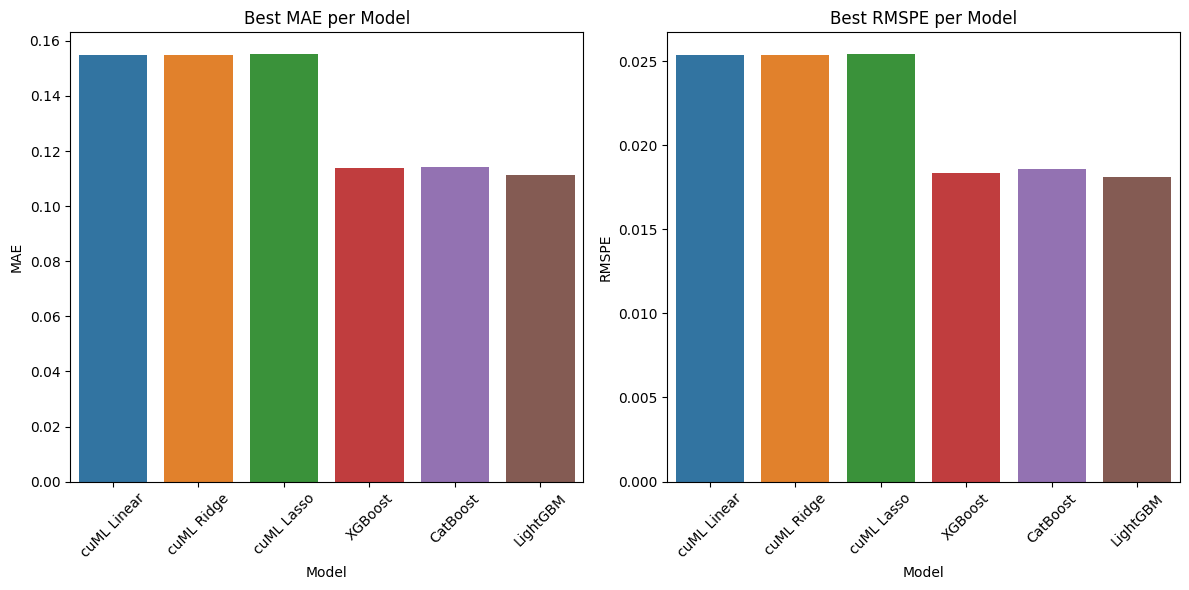

In [ ]:
plt.figure(figsize=(12, 6))

# Biểu đồ MAE
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="MAE", data=best_results_df)
plt.title("Best MAE per Model")
plt.xticks(rotation=45)

# Biểu đồ RMSPE
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="RMSPE", data=best_results_df)
plt.title("Best RMSPE per Model")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


LightGBM cho kết quả tốt nhất với MAE là 0.1114 và RMSE là 0.018093, cho thấy khả năng dự đoán chính xác và ít sai lệch hơn so với các mô hình khác.

XGBoost cũng cho kết quả khá tốt với MAE 0.1137 và RMSPE 0.1835, nhưng vẫn không bằng LightGBM về độ chính xác.

CatBoost có MAE là 0.1143 và RMSPE là 0.01859

Các mô hình cuML RF, cuML Ridge, cuML Linear, và cuML Lasso có hiệu suất thấp hơn, với MAE và RMSE lần lượt cao hơn và cùng nằm ở mức khoảng MAE: 0.154 và RMSPE: 0.025

## Ensemble

Qua quá trình tinh chỉnh siêu tham số, ta nhận thấy 3 mô hình có hiệu suất vượt trội hơn hẳn là XGBoost và LightGBM và CatBoost Do đó, để khai thác tối đa điểm mạnh của cả hai mô hình này, tăng khả năng dự đoán chính xác và giảm hiện tượng overfitting, chúng ta có thể áp dụng phương pháp Ensemble.

### Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

best_xgb = XGBRegressor(**{**xgb_best, "device": "cuda"})
best_lgb = LGBMRegressor(**{**lgb_best, "device": "gpu", "boosting_type": "gbdt"})
best_catboost = CatBoostRegressor(**{**catboost_best, 'task_type': 'GPU'})

base_learners = [
    ('xgb', best_xgb),
    ('lgb', best_lgb),
    ('catboost', best_catboost)
]

ensemble_model_1 = VotingRegressor(estimators=base_learners)

start = time.time()
ensemble_model_1.fit(X_train, y_train)
t = time.time() - start

ensemble_preds_1 = ensemble_model_1.predict(X_val)

mae = mean_absolute_error(y_val, ensemble_preds_1)
rmspe = rmspe_calc(y_val, ensemble_preds_1)

print(f"Ensemble Model MAE: {mae}")
print(f"Ensemble Model RMSPE: {rmspe}")
print(f"Ensemble Model Train Time (s): {t}")

0:	learn: 0.3312100	total: 22.6ms	remaining: 22.5s
1:	learn: 0.2749047	total: 44.2ms	remaining: 22s
2:	learn: 0.2383311	total: 66.2ms	remaining: 22s
3:	learn: 0.2104234	total: 89ms	remaining: 22.1s
4:	learn: 0.1939679	total: 111ms	remaining: 22s
5:	learn: 0.1816377	total: 134ms	remaining: 22.2s
6:	learn: 0.1738935	total: 158ms	remaining: 22.3s
7:	learn: 0.1676335	total: 186ms	remaining: 23s
8:	learn: 0.1632939	total: 212ms	remaining: 23.3s
9:	learn: 0.1604842	total: 235ms	remaining: 23.2s
10:	learn: 0.1577368	total: 257ms	remaining: 23s
11:	learn: 0.1556695	total: 279ms	remaining: 22.9s
12:	learn: 0.1532335	total: 302ms	remaining: 22.9s
13:	learn: 0.1505957	total: 320ms	remaining: 22.5s
14:	learn: 0.1489140	total: 337ms	remaining: 22.1s
15:	learn: 0.1476935	total: 354ms	remaining: 21.7s
16:	learn: 0.1463925	total: 372ms	remaining: 21.4s
17:	learn: 0.1455370	total: 389ms	remaining: 21.2s
18:	learn: 0.1444376	total: 407ms	remaining: 21s
19:	learn: 0.1437706	total: 441ms	remaining: 21.6s


### Stacking Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
stacking_ensemble = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

start = time.time()
stacking_ensemble.fit(X_train, y_train)
t = time.time() - start
stacking_preds = stacking_ensemble.predict(X_val)

mae = mean_absolute_error(y_val, stacking_preds)
rmspe = rmspe_calc(y_val, stacking_preds)

print(f"Stacking Ensemble Model MAE: {mae}")
print(f"Stacking Ensemble Model RMSPE: {rmspe}")
print(f"Stacking Ensemble Model Train Time (s): {t}")


0:	learn: 0.3312100	total: 23.5ms	remaining: 23.4s
1:	learn: 0.2749047	total: 45.2ms	remaining: 22.5s
2:	learn: 0.2383311	total: 69.9ms	remaining: 23.2s
3:	learn: 0.2104234	total: 100ms	remaining: 24.8s
4:	learn: 0.1939679	total: 124ms	remaining: 24.6s
5:	learn: 0.1816377	total: 162ms	remaining: 26.7s
6:	learn: 0.1738935	total: 184ms	remaining: 26s
7:	learn: 0.1676335	total: 207ms	remaining: 25.6s
8:	learn: 0.1632939	total: 228ms	remaining: 25s
9:	learn: 0.1604842	total: 249ms	remaining: 24.6s
10:	learn: 0.1577368	total: 271ms	remaining: 24.3s
11:	learn: 0.1556695	total: 289ms	remaining: 23.8s
12:	learn: 0.1532335	total: 308ms	remaining: 23.4s
13:	learn: 0.1505957	total: 327ms	remaining: 23s
14:	learn: 0.1489140	total: 345ms	remaining: 22.6s
15:	learn: 0.1476935	total: 364ms	remaining: 22.3s
16:	learn: 0.1463925	total: 383ms	remaining: 22.1s
17:	learn: 0.1455370	total: 400ms	remaining: 21.8s
18:	learn: 0.1444376	total: 416ms	remaining: 21.4s
19:	learn: 0.1437706	total: 433ms	remaining:

# Test

In [ ]:
test.dtypes

Id                           int64
Store                        int64
Open                       float64
Promo                        int64
StateHoliday                 int64
SchoolHoliday                int64
StoreType                    int64
Assortment                   int64
CompetitionDistance        float64
Promo2                       int64
PromoInterval                int64
SalesPerDay                float64
CustomersPerDay            float64
SalesPerCustomersPerDay    float64
TimeSincePromo2Start       float64
CompetitionAge             float64
Year                         int32
Month_sin                  float64
Month_cos                  float64
Day_Month_sin              float64
Day_Month_cos              float64
Day_Week_sin               float64
Day_Week_cos               float64
Days_To_Mar1                 int64
Days_To_Jul1                 int64
Days_To_Dec1                 int64
dtype: object

In [ ]:
import numpy as np
import pandas as pd

X_test = test.drop(columns="Id").values

xgb_preds = saved_models["XGBoost"].predict(X_test)
lgbm_preds = saved_models["LightGBM"].predict(X_test)
catboost_preds = saved_models["CatBoost"].predict(X_test)
stack_preds = stacking_ensemble.predict(X_test)
vote_preds = ensemble_model_1.predict(X_test)

xgb_preds = np.expm1(xgb_preds)*0.985
lgbm_preds = np.expm1(lgbm_preds)*0.985
stack_preds = np.expm1(stack_preds)*0.985
vote_preds = np.expm1(vote_preds)*0.985
catboost_preds = np.expm1(catboost_preds)*0.985

# Giới hạn các giá trị dự đoán không nhỏ hơn 0
xgb_preds = np.clip(xgb_preds, 0, None)
lgbm_preds = np.clip(lgbm_preds, 0, None)
stack_preds = np.clip(stack_preds, 0, None)
vote_preds = np.clip(vote_preds, 0, None)
catboost_preds=np.clip(catboost_preds,0,None)

# Nếu cửa hàng đóng cửa (Open == 0) → dự đoán luôn là 0
is_closed = test["Open"] == 0

xgb_preds[is_closed] = 0
lgbm_preds[is_closed] = 0
stack_preds[is_closed] = 0
vote_preds[is_closed] = 0
catboost_preds[is_closed] = 0

catboost_submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": catboost_preds
})

xgb_submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": xgb_preds
})

lgbm_submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": lgbm_preds
})

stack_submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": stack_preds
})

vote_submission = pd.DataFrame({
    "Id": test["Id"],
    "Sales": vote_preds
})

xgb_submission.to_csv("xgb_submission.csv", index=False)
lgbm_submission.to_csv("lgbm_submission.csv", index=False)
stack_submission.to_csv("stack_submission.csv", index=False)
vote_submission.to_csv("vote_submission.csv", index=False)
catboost_submission.to_csv("catboost_submission.csv", index=False)

print("Đã tạo các file submission cho từng mô hình thành công!")

Đã tạo các file submission cho từng mô hình thành công!
